<a href="https://colab.research.google.com/github/Scaicedo46/Solid-engine/blob/master/Covid19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Exploratory Data Analysis


Covid-19 has changed how we go about our everyday lives. How we travel, shop at supermarket, and how we work everyday. As a part of a team project I set out to see what are some potential drivers for Covid-19 cases. I explored how many cases affected us here locally in New Mexico and our surrounding states. At a state/county level I also explored gender distribution, public transportation, population density, and other variables to see if they have a potential links to the number of cases affecting the United States. Thank you and hope you enjoy the data adventure !

## Covid-19 cases in counties around and similiar to Bernalillo, NM

Citation- MyrnaMFL. “US Counties COVID 19 Dataset.” Kaggle, 16 May 2020, www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset.

Importing packages

In [5]:
#Just importing common data science packages to explore and visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and checking data types

In [6]:
#Importing the cases on a weekly basis into a data frame

c_df = pd.read_csv('/content/drive/MyDrive/COVID19 Capstone/us-counties.csv')
print(c_df.shape)
print(c_df.columns)
c_df.head()

(1141149, 6)
Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [7]:
#Checking what data types this csv contains and noticing that date is an object so I will convert to DateTime64 format
c_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [8]:
c_df['date'] = pd.to_datetime(c_df['date'])
c_df.dtypes

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths           float64
dtype: object

### Albuquerque metro area dfs

Now I want to pick out New Mexico's counties to see how case have risen over time, then compare them to other counties. 

In [9]:
#Here I seperate isolate only NM (New Mexico) from the Covid-19 dataframe
nm_df = c_df[c_df['state']=='New Mexico']
print('Shape of NM dataframe',nm_df.shape)
nm_df.head()

Shape of NM dataframe (11511, 6)


,date,county,state,fips,cases,deaths
1280,2020-03-11,Bernalillo,New Mexico,35001.0,1,0.0
1281,2020-03-11,Santa Fe,New Mexico,35049.0,1,0.0
1282,2020-03-11,Socorro,New Mexico,35053.0,2,0.0
1512,2020-03-12,Bernalillo,New Mexico,35001.0,2,0.0
1513,2020-03-12,Santa Fe,New Mexico,35049.0,2,0.0


In [10]:
#There are a couple of counties missing but since I am only focusing on Albuquerque- Metro Area I will continue to use this database
print(nm_df.county.unique())

['Bernalillo' 'Santa Fe' 'Socorro' 'Sandoval' 'Taos' 'San Miguel'
 'Doña Ana' 'McKinley' 'Lea' 'San Juan' 'Chaves' 'Cibola' 'Curry' 'Eddy'
 'Rio Arriba' 'Roosevelt' 'Valencia' 'Torrance' 'Catron' 'Grant' 'Otero'
 'Unknown' 'Lincoln' 'Los Alamos' 'Colfax' 'Luna' 'Quay' 'Guadalupe'
 'Harding' 'Union' 'Sierra' 'Hidalgo' 'Mora' 'De Baca']


In [11]:
# Here I seperate the NM dataframe into the four counties I want to look at closely
abq_df = nm_df[nm_df['county'].str.contains('Bernalillo')].copy(deep=True)
san_df = nm_df[nm_df['county'].str.contains('Sandoval')].copy(deep=True)
tor_df = nm_df[nm_df['county'].str.contains('Torrance')].copy(deep=True)
val_df = nm_df[nm_df['county'].str.contains('Valencia')].copy(deep=True)

In [12]:
#Checking if one of the df has only one county to make sure I filtered it properly
print('Unique counties in abq dataframe',abq_df.county.unique())

Unique counties in abq dataframe ['Bernalillo']


Below is a graph that shows the number of cases of Covid-19 from early March to March 2021. 

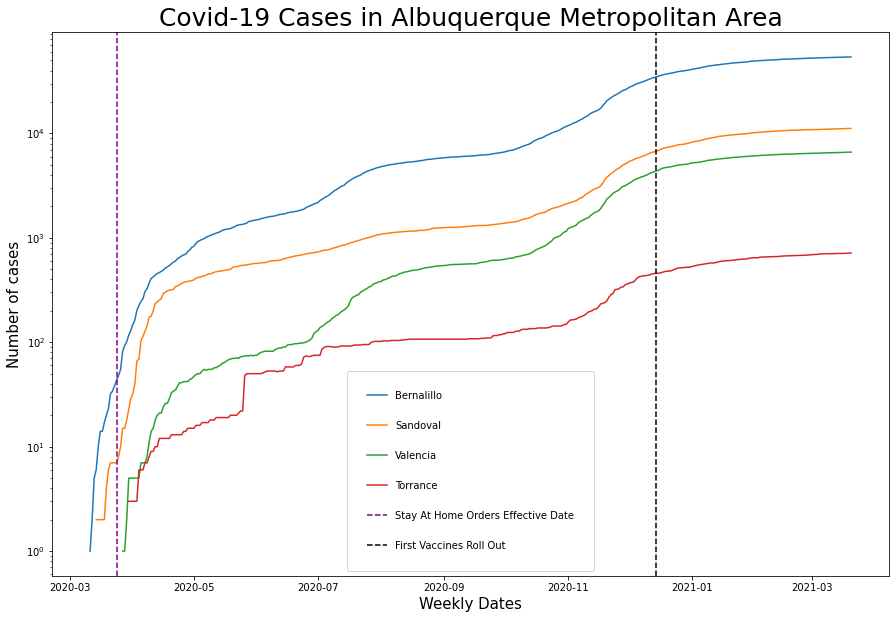

In [157]:
plt.figure(figsize=[15,10])

bern = plt.plot(abq_df['date'],abq_df['cases'], label= 'Bernalillo', )
san = plt.plot(san_df['date'],san_df['cases'], label= 'Sandoval')
val = plt.plot(val_df['date'],val_df['cases'], label= 'Valencia')
tor = plt.plot(tor_df['date'],tor_df['cases'], label= 'Torrance')

plt.yscale('log')
plt.xlabel('Weekly Dates', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Covid-19 Cases in Albuquerque Metropolitan Area', fontsize=25)
plt.axvline(pd.to_datetime('2020-3-24'), color='purple', linestyle= '--', label='Stay At Home Orders Effective Date')
plt.axvline(pd.to_datetime('2020-12-14'), color='black', linestyle= '--', label='First Vaccines Roll Out')
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

### Arizona and New Mexico counties


Now I want to pick out counties silmilar Bernallio from Arizona, a state comparable to New Mexico. 

In [14]:
##Here I seperate isolate only NM (New Mexico) from the Covid-19 dataframe
ariz_df = c_df[c_df['state']=='Arizona']
print(ariz_df.shape)
ariz_df.head()

(5586, 6)


,date,county,state,fips,cases,deaths
8,2020-01-26,Maricopa,Arizona,4013.0,1,0.0
13,2020-01-27,Maricopa,Arizona,4013.0,1,0.0
18,2020-01-28,Maricopa,Arizona,4013.0,1,0.0
23,2020-01-29,Maricopa,Arizona,4013.0,1,0.0
28,2020-01-30,Maricopa,Arizona,4013.0,1,0.0


In [15]:
#Checking the number of counties 
print(ariz_df.county.unique())

['Maricopa' 'Pinal' 'Pima' 'Graham' 'Navajo' 'Coconino' 'Santa Cruz'
 'Yavapai' 'Yuma' 'Apache' 'Cochise' 'Unknown' 'La Paz' 'Mohave' 'Gila'
 'Greenlee']


In [16]:
#Here I seperate the Arizona counties
mari_df = ariz_df[ariz_df['county'].str.contains('Maricopa')].copy(deep=True)
pinal_df = ariz_df[ariz_df['county'].str.contains('Pinal')].copy(deep=True)

The chart below shows that Maricopa county in Arizona has more cases than Bernalillo but it makes sense since they have over 6 times the population. So to give a better picture I got the percent of cases per population .

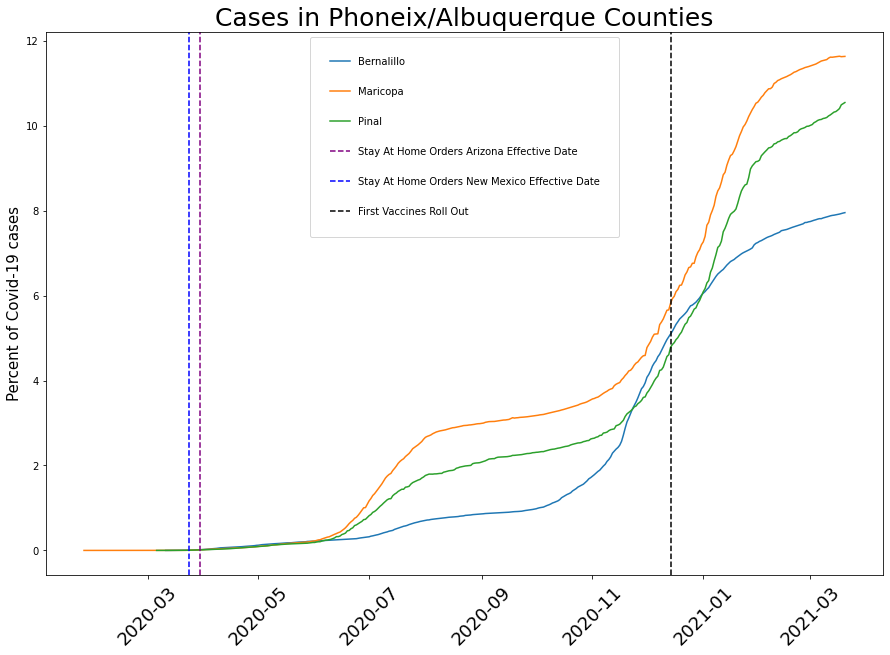

In [158]:
plt.figure(figsize=[15,10])

bern = plt.plot(abq_df['date'],abq_df['cases']/679000 * 100, label= 'Bernalillo')
mari = plt.plot(mari_df['date'],mari_df['cases']/4480000 * 100, label= 'Maricopa')
pinal = plt.plot(pinal_df['date'],pinal_df['cases']/462000 * 100, label= 'Pinal')

plt.xticks(rotation=45,fontsize=18)
plt.ylabel('Percent of Covid-19 cases', fontsize=15)
plt.title('Cases in Phoneix/Albuquerque Counties', fontsize=25)
plt.axvline(pd.to_datetime('2020-3-30'), color='purple', linestyle= '--', label='Stay At Home Orders Arizona Effective Date')
plt.axvline(pd.to_datetime('2020-3-24'), color='blue', linestyle= '--', label='Stay At Home Orders New Mexico Effective Date')
plt.axvline(pd.to_datetime('2020-12-14'), color='black', linestyle= '--', label='First Vaccines Roll Out')
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

### Denver metro area cases comp to Bernallio and Pinal county

In [18]:
#Now I will do the same with Colorado 

colo_df = c_df[c_df['state']=='Colorado']
print(colo_df.shape)
colo_df.head()

(22711, 6)


,date,county,state,fips,cases,deaths
548,2020-03-05,Douglas,Colorado,8035.0,1,0.0
549,2020-03-05,Jefferson,Colorado,8059.0,1,0.0
599,2020-03-06,Denver,Colorado,8031.0,2,0.0
600,2020-03-06,Douglas,Colorado,8035.0,3,0.0
601,2020-03-06,Eagle,Colorado,8037.0,1,0.0


In [19]:
#Viewing the total counties in Colorado
print(colo_df.county.unique())

['Douglas' 'Jefferson' 'Denver' 'Eagle' 'El Paso' 'Arapahoe' 'Larimer'
 'Gunnison' 'Pitkin' 'Adams' 'Clear Creek' 'Pueblo' 'Routt' 'Summit'
 'Weld' 'Boulder' 'Mesa' 'Garfield' 'Yuma' 'Crowley' 'Grand' 'Morgan'
 'Broomfield' 'Park' 'San Miguel' 'Chaffee' 'Elbert' 'Hinsdale' 'Montrose'
 'Unknown' 'La Plata' 'Logan' 'Teller' 'Delta' 'Fremont' 'Huerfano'
 'Otero' 'Kit Carson' 'Rio Grande' 'Washington' 'Alamosa' 'Costilla'
 'Lincoln' 'Baca' 'Moffat' 'Mineral' 'Montezuma' 'Archuleta' 'Phillips'
 'Lake' 'Saguache' 'Custer' 'Las Animas' 'Rio Blanco' 'Ouray' 'Gilpin'
 'Prowers' 'San Juan' 'Cheyenne' 'Conejos' 'Bent' 'Jackson' 'Sedgwick'
 'Dolores' 'Kiowa']


In [20]:
#Filtering only for Denver County
denver_df = colo_df[colo_df['county'].str.contains('Denver')].copy(deep=True)
print(colo_df.shape)

(22711, 6)


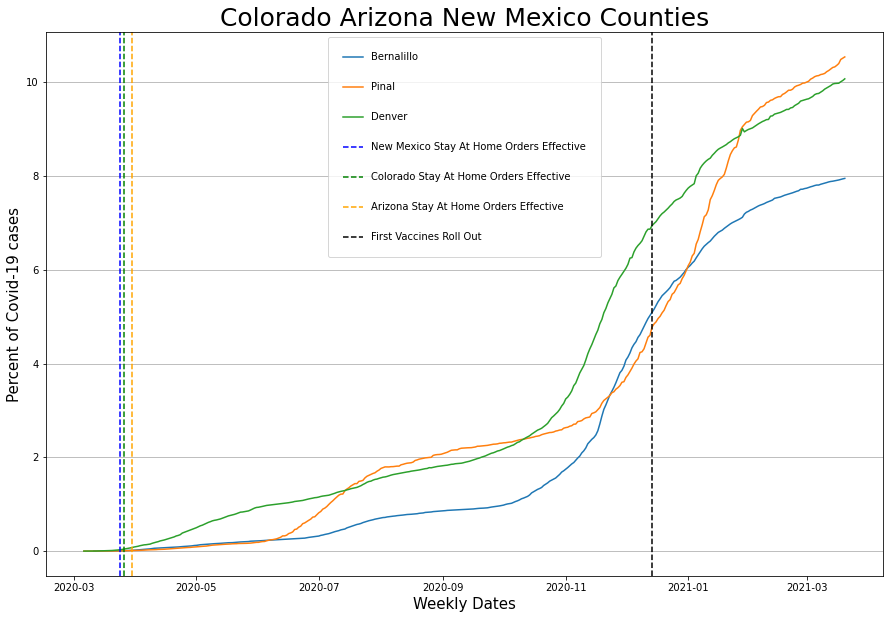

In [159]:
plt.figure(figsize=[15,10])

bern = plt.plot(abq_df['date'],abq_df['cases']/679000 * 100, label= 'Bernalillo')
pinal = plt.plot(pinal_df['date'],pinal_df['cases']/462000 * 100, label= 'Pinal')
den = plt.plot(denver_df['date'], denver_df['cases']/619968 * 100, label='Denver')

#plt.yscale('log')
plt.xlabel('Weekly Dates', fontsize=15)
plt.ylabel('Percent of Covid-19 cases', fontsize=15)
plt.title('Colorado Arizona New Mexico Counties', fontsize=25)
plt.grid(axis='y')
plt.axvline(pd.to_datetime('2020-3-24'), color='blue', linestyle= '--', label='New Mexico Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-03-26'), color='green', linestyle= '--', label='Colorado Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-3-30'), color='orange', linestyle= '--', label='Arizona Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-12-14'), color='black', linestyle= '--', label='First Vaccines Roll Out')
plt.legend(borderpad=1.5, labelspacing=2,fontsize=10);

### Counties with Pop density Similar to Albuquerque

Here using analysis I complete further in the notebook I selected counties with similar population density in the US and explored how many cases they had compare to Bernalillo, NM

In [22]:
#California , Santa Cruz New Mexico , Bernalillo , New York , Albany, South Carolina , Greenville were the counites I found with similar Population Densities
cali_df = c_df[c_df['state']=='California']
print(cali_df.shape)

ny_df = c_df[c_df['state']=='New York']
print(ny_df.shape)

sc_df = c_df[c_df['state']=='South Carolina']
print(sc_df.shape)

(21383, 6)
(21390, 6)
(16817, 6)


In [23]:
#Filtering the df for the specific counties
santaC_df = cali_df[cali_df['county'].str.contains('Santa Cruz')].copy(deep=True)
alb_df = ny_df[ny_df['county'].str.contains('Albany')].copy(deep=True)
greenvil_df = sc_df[sc_df['county'].str.contains('Greenville')].copy(deep=True)

print(cali_df.shape)
print(alb_df.shape)
print(greenvil_df.shape)

(21383, 6)
(374, 6)
(371, 6)


In [24]:
import matplotlib.patches as mpatches

In the graph below I take counties with similar population densty to bernalillo and then subtract then divide the cases by the land area (square mile) to get the amount of Covid-19 cases per square mile. It was intersting to see that South Carolina's late Stay at home order did not appear to cause a difference in cases. 

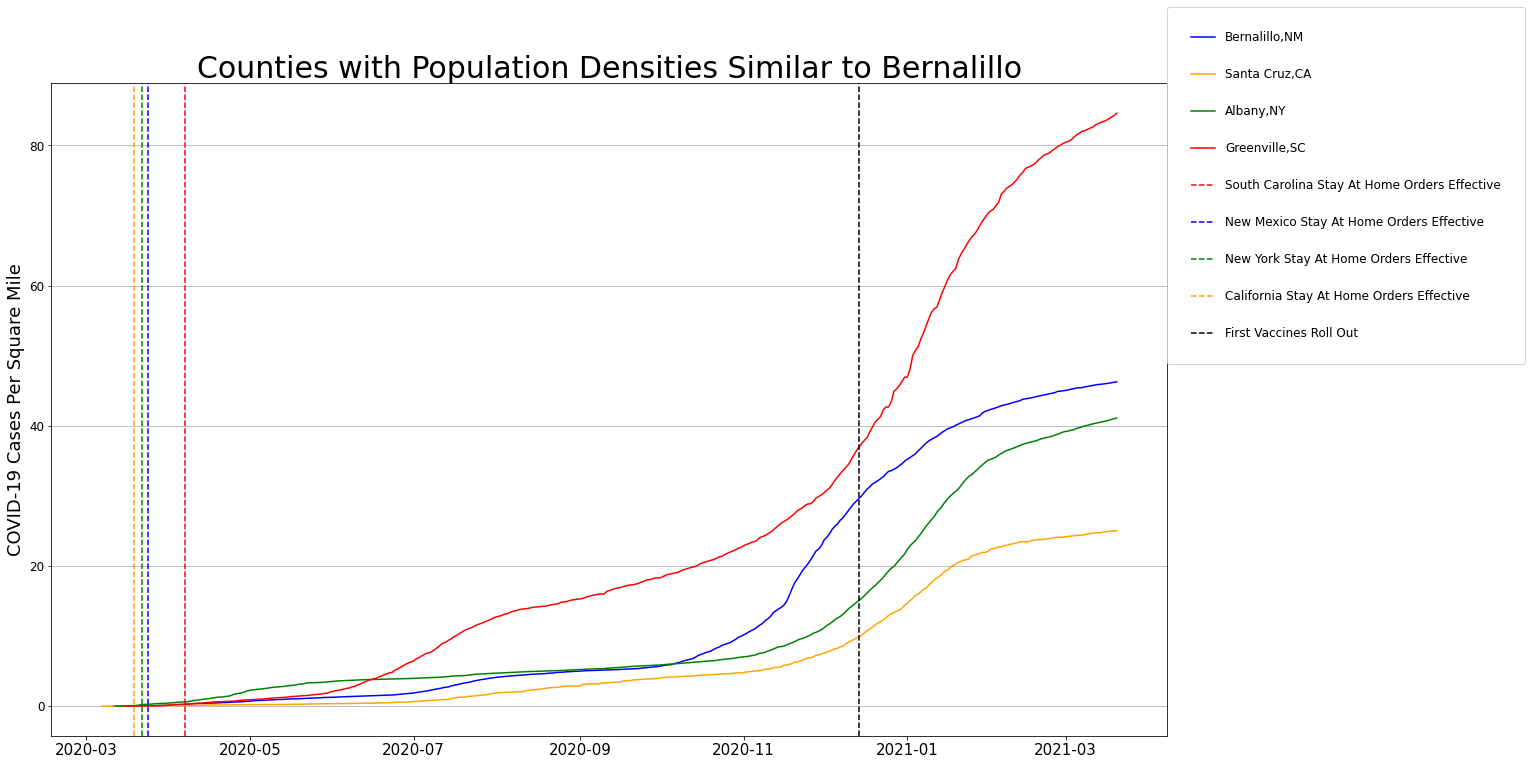

In [160]:
plt.figure(figsize=[20,12])

bern = plt.plot(abq_df['date'],abq_df['cases']/1167, label= 'Bernalillo,NM', color='blue')
santa = plt.plot(santaC_df['date'],santaC_df['cases']/607, label= 'Santa Cruz,CA', color='orange')
albany = plt.plot(alb_df['date'], alb_df['cases']/533, label='Albany,NY', color='green')
greenvil = plt.plot(greenvil_df['date'], greenvil_df['cases']/795, label='Greenville,SC', color='red')

#plt.yscale('log')
#plt.xlabel('Weeks', fontsize=18)
plt.ylabel('COVID-19 Cases Per Square Mile', fontsize=18)
plt.title('Counties with Population Densities Similar to Bernalillo', fontsize=30)
plt.grid(axis='y')
plt.axvline(pd.to_datetime('2020-4-07'), color='red', linestyle= '--', label='South Carolina Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-3-24'), color='blue', linestyle= '--', label='New Mexico Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-3-22'), color='green', linestyle= '--', label='New York Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-3-19'), color='orange', linestyle= '--', label='California Stay At Home Orders Effective')
plt.axvline(pd.to_datetime('2020-12-14'), color='black', linestyle= '--', label='First Vaccines Roll Out')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(borderpad=2, labelspacing=2,fontsize=12, loc=(1,0.57));

Conclusion - The dataframe was very useful at illustrating how many cases for counties in a time series. I think it would be useful to maybe pair this dataframe with another to see if we can normalize the cases by other factors.

## County population Df grab our county populations so we can compare us to other states.

Citation - US Census Bureau. “County Population by Characteristics: 2010-2018.” The United States Census Bureau, 27 Feb. 2020, www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-detail.html.

### New Mexico

I wanted to look into if there are any major difference between sexes in bernalillo to see if that has any relationship to the number of cases

In [26]:
county_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/PEP_2018_PEPAGESEX.csv', encoding = 'ISO-8859-1', skiprows=[0])
print(county_df.shape)
print(c_df.shape)
county_df.head()

(3142, 1092)
(1141149, 6)


,Id,Id2,Geography,"April 1, 2010 - Census - Both Sexes; Total","April 1, 2010 - Census - Male; Total","April 1, 2010 - Census - Female; Total","April 1, 2010 - Estimates Base - Both Sexes; Total","April 1, 2010 - Estimates Base - Male; Total","April 1, 2010 - Estimates Base - Female; Total",Population Estimate (as of July 1) - 2010 - Both Sexes; Total,Population Estimate (as of July 1) - 2010 - Male; Total,Population Estimate (as of July 1) - 2010 - Female; Total,Population Estimate (as of July 1) - 2011 - Both Sexes; Total,Population Estimate (as of July 1) - 2011 - Male; Total,Population Estimate (as of July 1) - 2011 - Female; Total,Population Estimate (as of July 1) - 2012 - Both Sexes; Total,Population Estimate (as of July 1) - 2012 - Male; Total,Population Estimate (as of July 1) - 2012 - Female; Total,Population Estimate (as of July 1) - 2013 - Both Sexes; Total,Population Estimate (as of July 1) - 2013 - Male; Total,Population Estimate (as of July 1) - 2013 - Female; Total,Population Estimate (as of July 1) - 2014 - Both Sexes; Total,Population Estimate (as of July 1) - 2014 - Male; Total,Population Estimate (as of July 1) - 2014 - Females; Total,Population Estimate (as of July 1) - 2015 - Both Sexes; Total,Population Estimate (as of July 1) - 2015 - Male; Total,Population Estimate (as of July 1) - 2015 - Female; Total,Population Estimate (as of July 1) - 2016 - Both Sexes; Total,Population Estimate (as of July 1) - 2016 - Male; Total,Population Estimate (as of July 1) - 2016 - Female; Total,Population Estimate (as of July 1) - 2017 - Both Sexes; Total,Population Estimate (as of July 1) - 2017 - Male; Total,Population Estimate (as of July 1) - 2017 - Female; Total,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Male; Total,Population Estimate (as of July 1) - 2018 - Female; Total,"April 1, 2010 - Census - Both Sexes; Total - Under 5 years","April 1, 2010 - Census - Male; Total - Under 5 years","April 1, 2010 - Census - Female; Total - Under 5 years","April 1, 2010 - Estimates Base - Both Sexes; Total - Under 5 years",...,Population Estimate (as of July 1) - 2016 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Male; 15 to 44 years,Population Estimate (as of July 1) - 2017 - Female; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Both Sexes; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Male; 15 to 44 years,Population Estimate (as of July 1) - 2018 - Female; 15 to 44 years,"April 1, 2010 - Census - Both Sexes; Median age (years)","April 1, 2010 - Census - Male; Median age (years)","April 1, 2010 - Census - Female; Median age (years)","April 1, 2010 - Estimates Base - Both Sexes; Median age (years)","April 1, 2010 - Estimates Base - Male; Median age (years)","April 1, 2010 - Estimates Base - Female; Median age (years)",Population Estimate (as of July 1) - 2010 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2010 - Male; Median age (years),Population Estimate (as of July 1) - 2010 - Female; Median age (years),Population Estimate (as of July 1) - 2011 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2011 - Male; Median age (years),Population Estimate (as of July 1) - 2011 - Female; Median age (years),Population Estimate (as of July 1) - 2012 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2012 - Male; Median age (years),Population Estimate (as of July 1) - 2012 - Female; Median age (years),Population Estimate (as of July 1) - 2013 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2013 - Male; Median age (years),Population Estimate (as of July 1) - 2013 - Female; Median age (years),Population Estimate (as of July 1) - 2014 - Both Sexes; Median age (years),Population Estimate (as of July 1) - 2014 - Male; Median age (years),Population Estimate (as of July 1) - 2014 - Fema

In [27]:
nm_county_df = county_df[county_df['Geography'].str.contains('New Mexico')]
print(nm_county_df.shape)

(33, 1092)


In [28]:
nm_county_pop = nm_county_df[['Geography','Population Estimate (as of July 1) - 2018 - Both Sexes; Total',
                              'Population Estimate (as of July 1) - 2018 - Male; Total', 
                              'Population Estimate (as of July 1) - 2018 - Female; Total']].copy(deep=True)
nm_county_df.reset_index(inplace=True, drop=True)

In [29]:
nm_county_pop.head()

,Geography,Population Estimate (as of July 1) - 2018 - Both Sexes; Total,Population Estimate (as of July 1) - 2018 - Male; Total,Population Estimate (as of July 1) - 2018 - Female; Total
1795,"Bernalillo County, New Mexico",678701,332972,345729
1796,"Catron County, New Mexico",3578,1889,1689
1797,"Chaves County, New Mexico",64689,32098,32591
1798,"Cibola County, New Mexico",26746,13666,13080
1799,"Colfax County, New Mexico",12110,6142,5968


Looking at the graph below when I looked into see if there were any odd gender distributions I found that bernalillo was around 50/50 so I concluded my search into gender distributions.

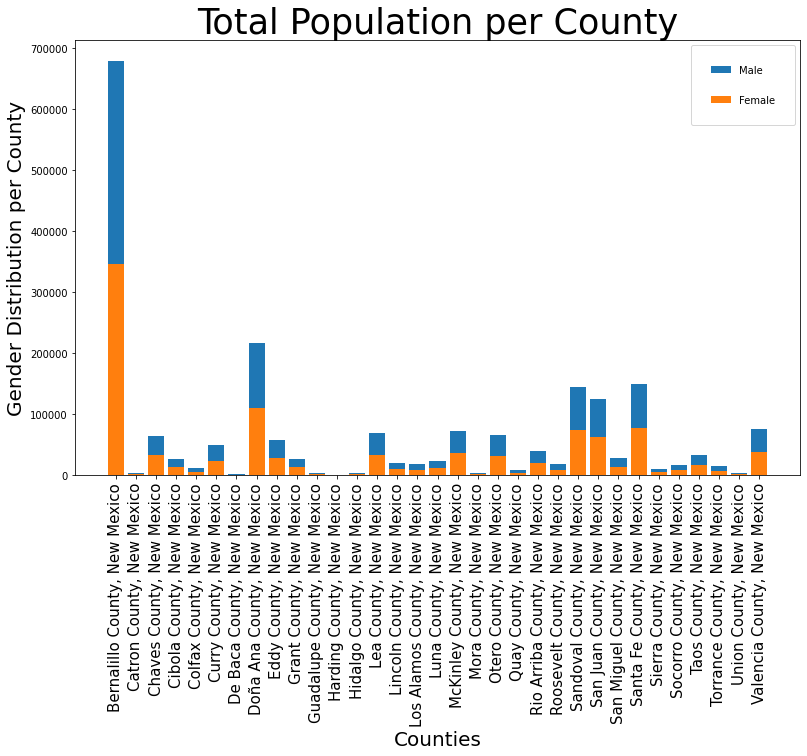

In [30]:
plt.figure(figsize=[13,8])
plt.bar(nm_county_pop['Geography'],nm_county_pop['Population Estimate (as of July 1) - 2018 - Both Sexes; Total'],label='Male')
plt.bar(nm_county_pop['Geography'],nm_county_pop['Population Estimate (as of July 1) - 2018 - Female; Total'], label='Female')
plt.xticks(rotation=90, fontsize=15)
plt.ylabel('Gender Distribution per County', fontsize=20)
plt.xlabel('Counties', fontsize=20)
plt.title('Total Population per County',fontsize=35)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

Conclusion- In hindsight I would have liked to look at more States and counties with similar population density to give a actual answer to whether gender distribution had a realtionship with Covid-19 cases.

## Stay at home orders 

Citations - “Stay-At-Home Orders to Fight COVID-19 in the United States: The Risks of a Scattershot Approach.” The Henry J. Kaiser Family Foundation, 6 Apr. 2020, www.kff.org/coronavirus-policy-watch/stay-at-home-orders-to-fight-covid19/.

Here I import the stay at home orders so I could potentially look into if when government interventions affected the number of cases in the United States.

In [31]:
import matplotlib.dates as mdates
sah_df = pd.read_excel('/content/drive/My Drive/COVID19 Capstone/Statewide-Stay-at-Home-Orders.xlsx', skiprows=[0,1])
sah_df.head(50)

,State,Date Announced,Effective Date
0,Alabama,April 3,April 4
1,Alaska,March 27,March 28
2,Arizona,March 30,March 31
3,Arkansas,-,-
4,California,March 19,March 19
5,Colorado,March 26,March 26
6,Connecticut,March 20,March 23
7,Delaware,March 22,March 24
8,District of Columbia,March 30,April 1
9,Florida,April 1,April 3


In [32]:
sah_df.dtypes

State             object
Date Announced    object
Effective Date    object
dtype: object

In [33]:
#Here I convert the data format from the kff dataframe into a datetime format.
sah_df['Date Announced'] = pd.to_datetime('2020 ' + sah_df['Date Announced'].astype(str), format=('%Y %B %d'), errors='coerce')
sah_df['Effective Date'] = pd.to_datetime('2020 ' + sah_df['Effective Date'].astype(str), format=('%Y %B %d'), errors='coerce')

In [34]:
sah_df.head()

,State,Date Announced,Effective Date
0,Alabama,2020-04-03,2020-04-04
1,Alaska,2020-03-27,2020-03-28
2,Arizona,2020-03-30,2020-03-31
3,Arkansas,NaT,NaT
4,California,2020-03-19,2020-03-19


## State population Data 

Citations - US States - Ranked by Population 2020, worldpopulationreview.com/states/.    
“Government-Crawled COVID-19 Data, Certified with Blockchain.” CoronavirusAPI, coronavirusapi.com/.

Looking into population data I wanted to grab the population in each state and create a dataframe with population, population density, and cases to explore any potential trends.

In [35]:
pop_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/State_Pop_Data.csv')

In [36]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))


In [37]:
pop_df.index = pop_df['State']
pop_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
State,,,,,,,,,
California,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727
Texas,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204
Florida,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256
New York,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211
Pennsylvania,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449


In [38]:
state_abbrev_df =  pd.Series(us_state_abbrev)
state_abbrev_df.head()

Alabama       AL
Alaska        AK
Arizona       AZ
Arkansas      AR
California    CA
dtype: object

In [39]:
pop_df['state_abbrev'] = pd.Series(us_state_abbrev, index=pop_df.index)

In [40]:
pop_df.head()

,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density,state_abbrev
State,,,,,,,,,,
California,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727,CA
Texas,2,Texas,29472295,0.0268,28701845,25242679,0.1676,0.0881,112.8204,TX
Florida,3,Florida,21992985,0.0326,21299325,18845785,0.1670,0.0658,410.1256,FL
New York,4,New York,19440469,-0.0052,19542209,19400080,0.0021,0.0581,412.5211,NY
Pennsylvania,5,Pennsylvania,12820878,0.0011,12807060,12711158,0.0086,0.0383,286.5449,PA


In [41]:
#Here I take a dataframe from the use the coronavirus api and combine it my population data frame.
cv_per_state = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/states_covid.csv')
cv_per_state.head()

,"name,",tested,positive,deaths
0,AK,32418,388,10
1,AL,150717,11389,485
2,AR,81529,4463,98
3,AZ,186904,13169,651
4,CA,1133906,74936,3108


In [42]:
#Here I rename the name, column to state_abbrev so it makes more sense.
cv_per_state = cv_per_state.rename(columns={'name,':'state_abbrev'})
cv_per_state.head()

,state_abbrev,tested,positive,deaths
0,AK,32418,388,10
1,AL,150717,11389,485
2,AR,81529,4463,98
3,AZ,186904,13169,651
4,CA,1133906,74936,3108


In [43]:
#Then I merge the Covid-19 dataframe with the population data frame.
cases_per_state = pd.merge(pop_df,cv_per_state, on='state_abbrev')
cases_per_state = cases_per_state.drop(columns=['Growth','Pop2018','growthSince2010','Percent']) 
cases_per_state.head()

,rank,State,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
0,1,California,39937489,37320903,256.3727,CA,1133906,74936,3108
1,2,Texas,29472295,25242679,112.8204,TX,645992,45198,1272
2,3,Florida,21992985,18845785,410.1256,FL,629895,44138,1917
3,4,New York,19440469,19400080,412.5211,NY,1338048,345813,22304
4,5,Pennsylvania,12820878,12711158,286.5449,PA,327836,61611,4403


Below are a couple of graphs of the percent of poisitve cases per state and the highest cases percentage are New York and New Jesery. So when coming up with potential reasons why they might be so high we will look at variables in those states that may cause them to have more cases of Covid-19

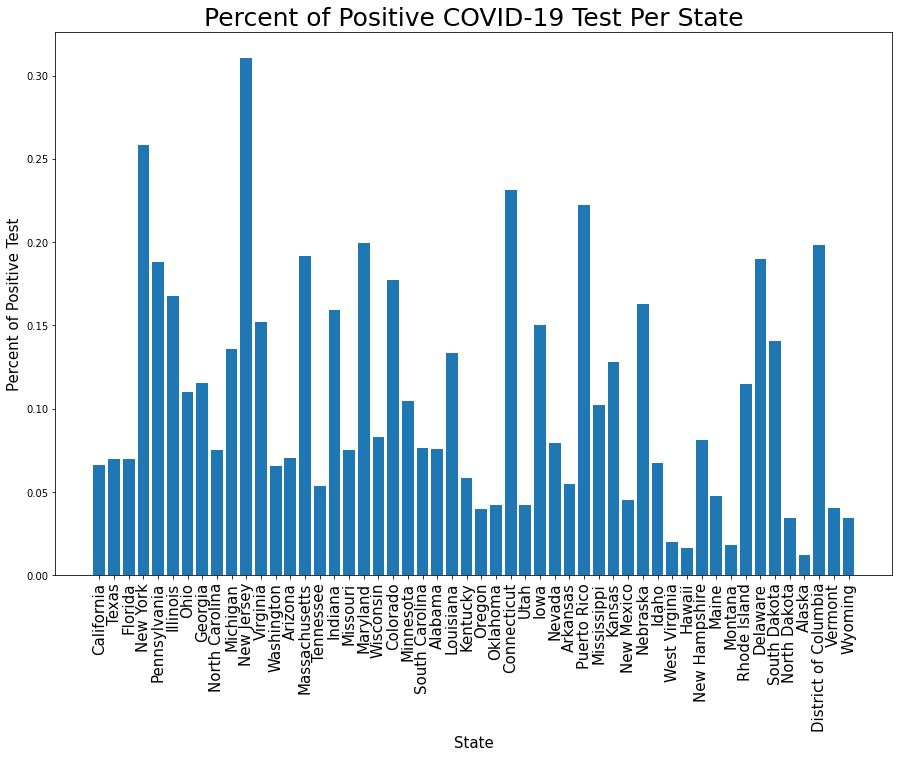

In [44]:
plt.figure(figsize=[15,10])
plt.bar(cases_per_state['State'],cases_per_state['positive']/cases_per_state['tested'])
plt.xticks(rotation=90, fontsize=15)
plt.title('Percent of Positive COVID-19 Test Per State', fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Percent of Positive Test', fontsize=15)
plt.show();

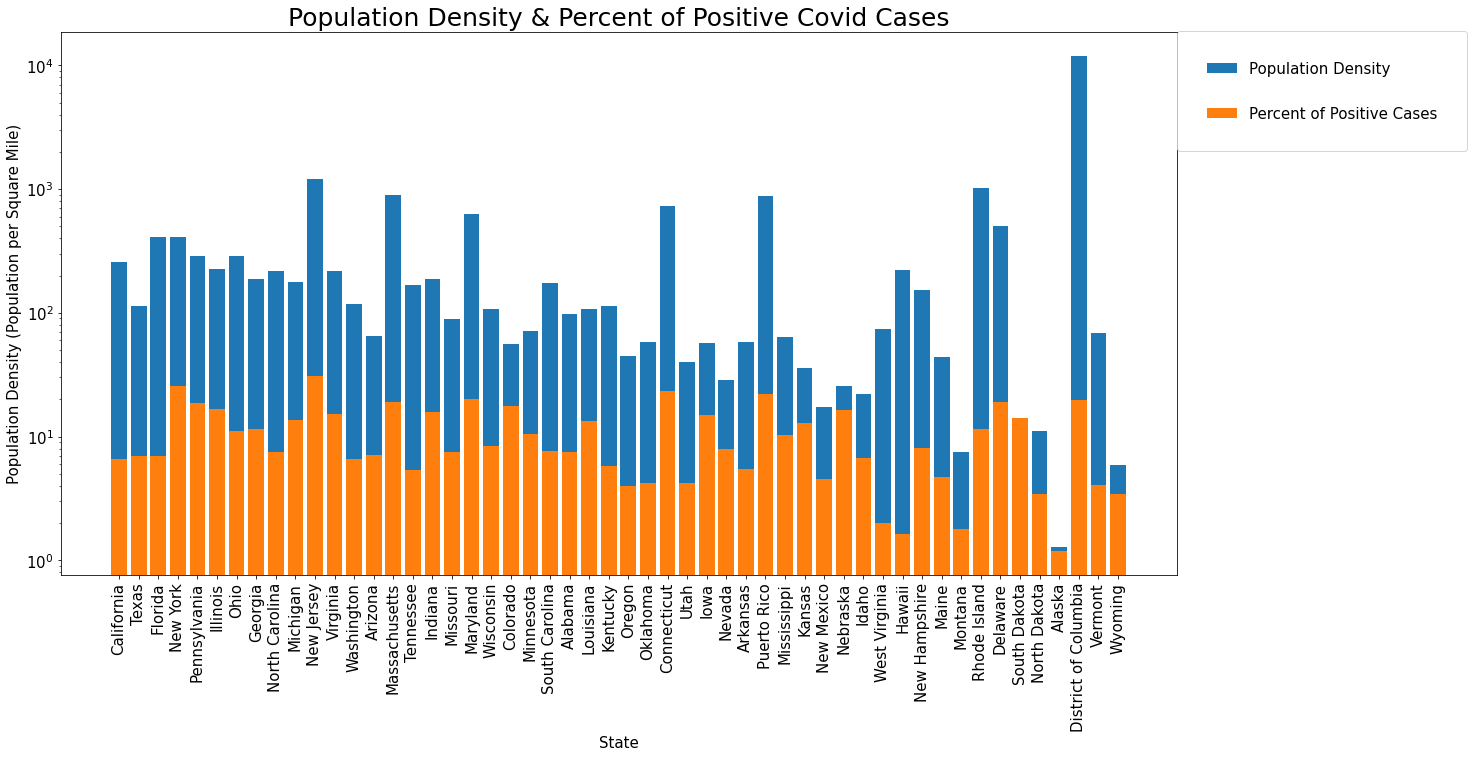

In [45]:
plt.figure(figsize=[20,10])
plt.bar(cases_per_state['State'],cases_per_state['density'], label='Population Density')
plt.bar(cases_per_state['State'],cases_per_state['positive']/cases_per_state['tested']*100,label='Percent of Positive Cases')
plt.yscale('log')
plt.xticks(rotation=90, fontsize=15, c='black')
plt.yticks(fontsize=15, c='black')
plt.title('Population Density & Percent of Positive Covid Cases', fontsize=25)
plt.xlabel('State',fontsize=15)
plt.ylabel('Population Density (Population per Square Mile)', fontsize=15)
plt.legend(borderpad=2, labelspacing=2,fontsize=15, loc=(1,0.78));

Population density was one of the variables I looked into the most because if people found themselves in close contact with other people more often, then they had the chance of contracting Covid-19. So in the graoh below we see a small trend as population density increases cases tend to increase.

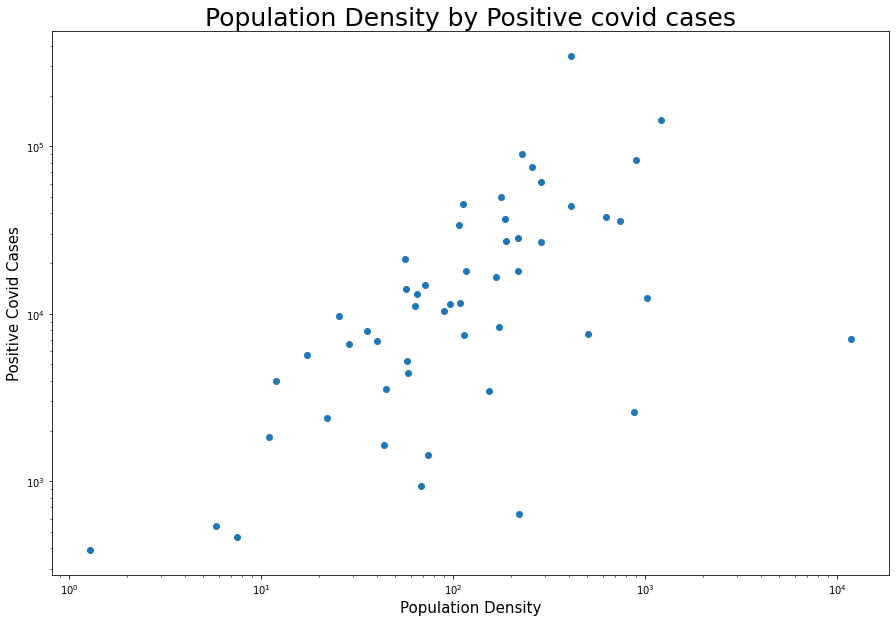

In [46]:
plt.figure(figsize=[15,10])
plt.scatter(cases_per_state['density'], cases_per_state['positive'])
plt.xscale('log')
plt.yscale('log')
plt.title('Population Density by Positive covid cases', fontsize=25)
plt.xlabel('Population Density',fontsize=15)
plt.ylabel('Positive Covid Cases', fontsize=15)
plt.show();

### Linear regression model

In [47]:
#Here I create a dataframe to use in a Linear regression model targeting positive cases 
cases_per_state = pd.merge(sah_df,cases_per_state, on='State')
cases_per_state.head()

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
0,Alabama,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485
1,Alaska,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10
2,Arizona,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651
3,Arkansas,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98
4,California,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108


In [48]:
cases_per_state.sort_values(by='density', ascending=False).head(5)

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths
8,District of Columbia,2020-03-30,2020-04-01,50,720687,605085,11814.5410,DC,35532,7042,375
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,462972,143905,10138
38,Rhode Island,2020-03-28,2020-03-28,45,1056161,1053938,1021.4323,RI,108480,12434,489
20,Massachusetts,2020-03-23,2020-03-24,15,6976597,6566431,894.4355,MA,435679,83421,5592
6,Connecticut,2020-03-20,2020-03-23,29,3563077,3579125,735.8689,CT,155908,36085,3285


In [49]:
cases_per_state['case_per_capita'] = cases_per_state['positive']/cases_per_state['Pop']*100

In [50]:
cases_per_state.sort_values(by='density', ascending=False).head(15)

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
8,District of Columbia,2020-03-30,2020-04-01,50,720687,605085,11814.5410,DC,35532,7042,375,0.977123
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,462972,143905,10138,1.610293
38,Rhode Island,2020-03-28,2020-03-28,45,1056161,1053938,1021.4323,RI,108480,12434,489,1.177283
20,Massachusetts,2020-03-23,2020-03-24,15,6976597,6566431,894.4355,MA,435679,83421,5592,1.195726
6,Connecticut,2020-03-20,2020-03-23,29,3563077,3579125,735.8689,CT,155908,36085,3285,1.012748
19,Maryland,2020-03-30,2020-03-30,19,6083116,5788642,626.6731,MD,190175,37968,1957,0.624154
7,Delaware,2020-03-22,2020-03-24,46,982895,899595,504.3073,DE,39758,7547,286,0.767834
31,New York,2020-03-20,2020-03-22,4,19440469,19400080,412.5211,NY,1338048,345813,22304,1.778831
9,Florida,2020-04-01,2020-04-03,3,21992985,18845785,410.1256,FL,629895,44138,1917,0.200691
34,Ohio,2020-03-22,2020-03-23,7,11747694,11539327,287.5038,OH,244577,26954,1581,0.229441


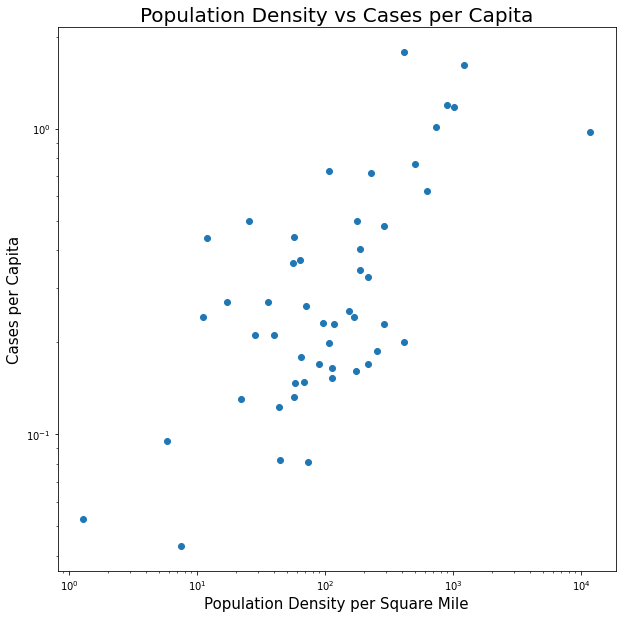

In [51]:
plt.figure(figsize=[10,10])
plt.scatter('density','case_per_capita', data=cases_per_state)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Population Density per Square Mile', fontsize=15)
plt.ylabel('Cases per Capita', fontsize=15)
plt.title('Population Density vs Cases per Capita', fontsize=20);

In [52]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
target = pd.DataFrame(cases_per_state.positive, columns=['positive'])
target.head()

,positive
0,11389
1,388
2,13169
3,4463
4,74936


In [54]:
target['positive']= np.log(target['positive'])

In [55]:
target.head()

,positive
0,9.340403
1,5.961005
2,9.485621
3,8.403576
4,11.224390


In [56]:
X = pd.DataFrame(cases_per_state[['density']])
X['Ones'] = 1
X.tail()

,density,Ones
45,218.4403,1
46,117.3272,1
47,73.9691,1
48,108.0497,1
49,5.8400,1


In [57]:
X['Ones'] = np.log(X['density'])

In [58]:
X.head()

,density,Ones
0,96.9221,4.573908
1,1.2863,0.251770
2,64.9550,4.173695
3,58.4030,4.067367
4,256.3727,5.546632


In [59]:
model = sm.OLS(target, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              685.7
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                    5.00e-36
Time:                        16:50:29   Log-Likelihood:                         -98.499
No. Observations:                  50   AIC:                                      201.0
Df Residuals:                      48   BIC:                                      204.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
density       -0.0009      0.000     -5.702      0.000      -0.001      -0.001
Ones           2.0081      0.056     35.723      0.000       1.895       2.121
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.929
Skew:                           0.197   Prob(JB):                        0.628
Kurtosis:                       3.539   Cond. No.                         382.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
predictions = model.predict(X)

In [61]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, target)
target_predict = reg.predict(X)

reg.score(X,target)

0.6244888671576942

[[-4.18185583e-04  8.94960846e-01]]
[5.35605141]


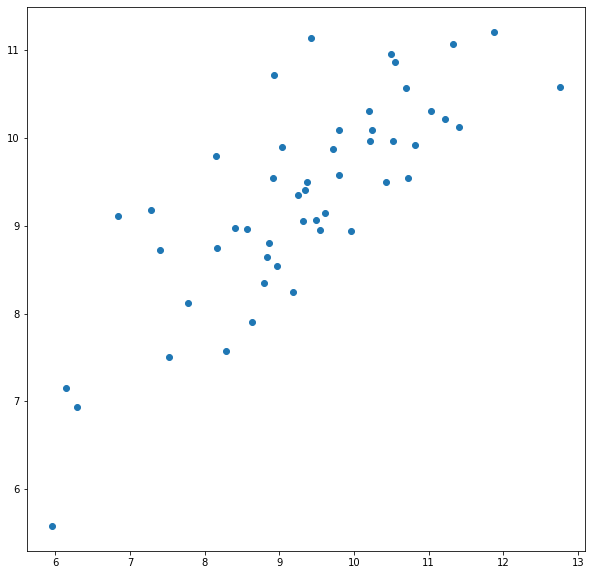

In [62]:
print(reg.coef_)
print(reg.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(target, target_predict);
#plt.axhline(y=0.0, c='red');

The scatter plot above shows that the model tended to overpredict on lower population denisties, most likely because it is a underfitted model.

## County covid cases vs Pop Density - CAPSTONE Visual 

Here I will do some exploratory data analysis on cases per county and see if it has a correlation to county population density

In [63]:
county_pop_density = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/County Pop Density.csv')

In [64]:
county_pop_density.head()

,id,id2,geography,targetGeoId,targetGeoId2,geographicArea,geographicArea2,population,housingUnits,totalArea,waterArea,landArea,populationDensity,housingDensity
0,0100000US,NaN,United States,0100000US,NaN,United States,United States,308745538(r38234),131704730(r15031),3796742.23,264836.79,3531905.43,87.4,37.3
1,0100000US,NaN,United States,0400000US01,1.0,United States - Alabama,Alabama,4779736(r38235),2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0500000US01001,1001.0,United States - Alabama - Autauga County,Autauga County,54571,22135,604.39,9.95,594.44,91.8,37.2
3,0100000US,NaN,United States,0500000US01003,1003.0,United States - Alabama - Baldwin County,Baldwin County,182265,104061,2027.31,437.53,1589.78,114.6,65.5
4,0100000US,NaN,United States,0500000US01005,1005.0,United States - Alabama - Barbour County,Barbour County,27457,11829(r15033),904.52,19.64,884.88,31.0,13.4


In [65]:
c_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [66]:
print(c_df.shape)
print(county_pop_density.shape)

(1141149, 6)
(3195, 14)


In [67]:
test_c_df = c_df[c_df['date']=='2020-05-14']

In [68]:
test_c_df.head()

,date,county,state,fips,cases,deaths
142209,2020-05-14,Autauga,Alabama,1001.0,104,4.0
142210,2020-05-14,Baldwin,Alabama,1003.0,243,8.0
142211,2020-05-14,Barbour,Alabama,1005.0,74,1.0
142212,2020-05-14,Bibb,Alabama,1007.0,46,1.0
142213,2020-05-14,Blount,Alabama,1009.0,45,0.0


In [69]:
county_pop_density.head()

,id,id2,geography,targetGeoId,targetGeoId2,geographicArea,geographicArea2,population,housingUnits,totalArea,waterArea,landArea,populationDensity,housingDensity
0,0100000US,NaN,United States,0100000US,NaN,United States,United States,308745538(r38234),131704730(r15031),3796742.23,264836.79,3531905.43,87.4,37.3
1,0100000US,NaN,United States,0400000US01,1.0,United States - Alabama,Alabama,4779736(r38235),2171853(r15032),52420.07,1774.74,50645.33,94.4,42.9
2,0100000US,NaN,United States,0500000US01001,1001.0,United States - Alabama - Autauga County,Autauga County,54571,22135,604.39,9.95,594.44,91.8,37.2
3,0100000US,NaN,United States,0500000US01003,1003.0,United States - Alabama - Baldwin County,Baldwin County,182265,104061,2027.31,437.53,1589.78,114.6,65.5
4,0100000US,NaN,United States,0500000US01005,1005.0,United States - Alabama - Barbour County,Barbour County,27457,11829(r15033),904.52,19.64,884.88,31.0,13.4


In [70]:
#Filtering the Counties from the dataframe 
cpd_test = county_pop_density[county_pop_density['geographicArea2'].str.contains('County').copy(deep=True)]

In [71]:
cpd_test.head()

,id,id2,geography,targetGeoId,targetGeoId2,geographicArea,geographicArea2,population,housingUnits,totalArea,waterArea,landArea,populationDensity,housingDensity
2,0100000US,NaN,United States,0500000US01001,1001.0,United States - Alabama - Autauga County,Autauga County,54571,22135,604.39,9.95,594.44,91.8,37.2
3,0100000US,NaN,United States,0500000US01003,1003.0,United States - Alabama - Baldwin County,Baldwin County,182265,104061,2027.31,437.53,1589.78,114.6,65.5
4,0100000US,NaN,United States,0500000US01005,1005.0,United States - Alabama - Barbour County,Barbour County,27457,11829(r15033),904.52,19.64,884.88,31.0,13.4
5,0100000US,NaN,United States,0500000US01007,1007.0,United States - Alabama - Bibb County,Bibb County,22915,8981,626.17,3.59,622.58,36.8,14.4
6,0100000US,NaN,United States,0500000US01009,1009.0,United States - Alabama - Blount County,Blount County,57322,23887,650.63,5.85,644.78,88.9,37.0


In [72]:
print(test_c_df.shape)
print(cpd_test.shape)

(2999, 6)
(3007, 14)


In [73]:
test_c_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [74]:
cpd_test = cpd_test.rename(columns={'targetGeoId2':'fips'})

In [75]:
cpd_clean = pd.concat([cpd_test['fips'],cpd_test['populationDensity'],cpd_test['landArea']], axis=1)

In [76]:
cpd_clean.head()

,fips,populationDensity,landArea
2,1001.0,91.8,594.44
3,1003.0,114.6,1589.78
4,1005.0,31.0,884.88
5,1007.0,36.8,622.58
6,1009.0,88.9,644.78


In [77]:
casesVpopden = pd.merge(test_c_df,cpd_clean, on='fips')

In [78]:
casesVpopden.head()

,date,county,state,fips,cases,deaths,populationDensity,landArea
0,2020-05-14,Autauga,Alabama,1001.0,104,4.0,91.8,594.44
1,2020-05-14,Baldwin,Alabama,1003.0,243,8.0,114.6,1589.78
2,2020-05-14,Barbour,Alabama,1005.0,74,1.0,31.0,884.88
3,2020-05-14,Bibb,Alabama,1007.0,46,1.0,36.8,622.58
4,2020-05-14,Blount,Alabama,1009.0,45,0.0,88.9,644.78


In [79]:
casesVpopden.state.unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [80]:
casesVpopden.dtypes

date                 datetime64[ns]
county                       object
state                        object
fips                        float64
cases                         int64
deaths                      float64
populationDensity           float64
landArea                    float64
dtype: object

In [81]:
casesVpopden.isnull().any()

date                 False
county               False
state                False
fips                 False
cases                False
deaths               False
populationDensity    False
landArea             False
dtype: bool

Below is a scatter plot of Covid-19 cases per capita versus Population Density. The scatter plot shows that population has predictive power when targeting the number of cases. Which makes sense higher population density usually equals more cases.

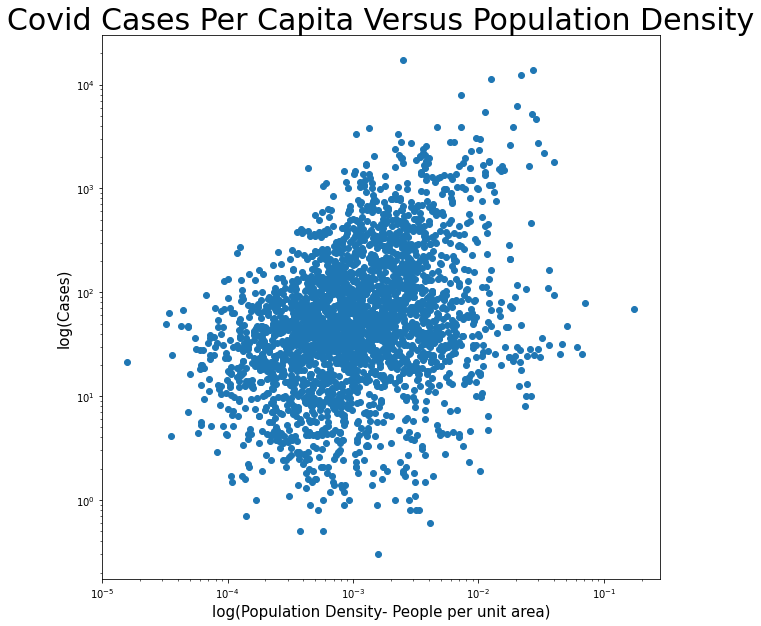

In [82]:
plt.figure(figsize=[10,10])

plt.title('Covid Cases Per Capita Versus Population Density', fontsize=30)
plt.ylabel('log(Cases)',fontsize=15)
plt.xlabel('log(Population Density- People per unit area)', fontsize=15)
plt.scatter(casesVpopden['cases']/(casesVpopden['populationDensity']*casesVpopden['landArea']),casesVpopden['populationDensity'])

plt.yscale('log')
plt.xscale('log');

In [83]:
casesVpopden.head()

,date,county,state,fips,cases,deaths,populationDensity,landArea
0,2020-05-14,Autauga,Alabama,1001.0,104,4.0,91.8,594.44
1,2020-05-14,Baldwin,Alabama,1003.0,243,8.0,114.6,1589.78
2,2020-05-14,Barbour,Alabama,1005.0,74,1.0,31.0,884.88
3,2020-05-14,Bibb,Alabama,1007.0,46,1.0,36.8,622.58
4,2020-05-14,Blount,Alabama,1009.0,45,0.0,88.9,644.78


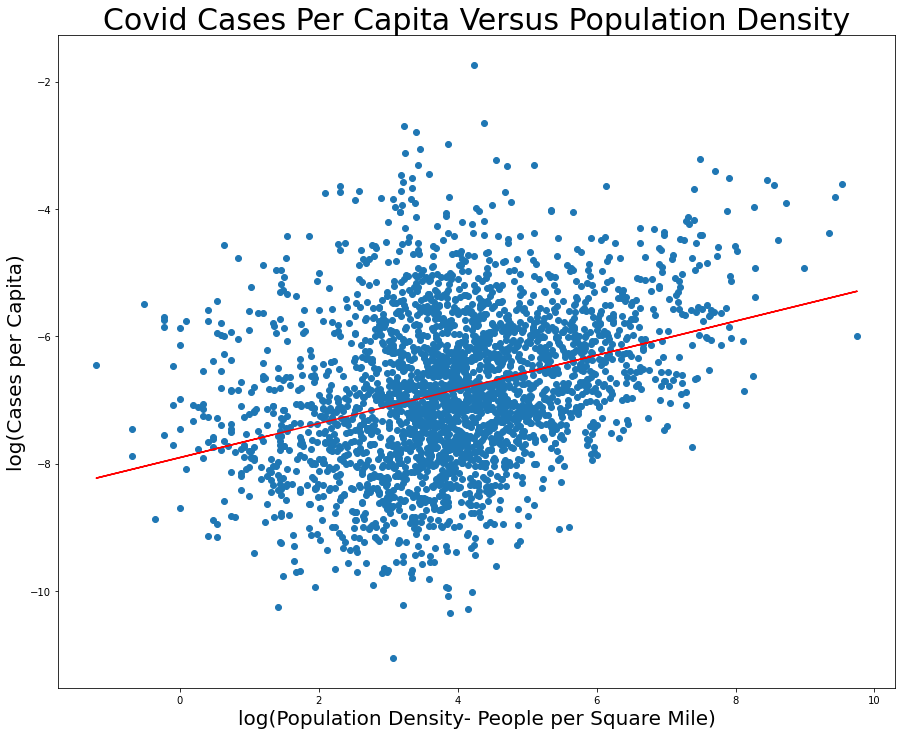

In [84]:
plt.figure(figsize=[15,12])
plt.title('Covid Cases Per Capita Versus Population Density', fontsize=30)
plt.ylabel('log(Cases per Capita)',fontsize=20)
plt.xlabel('log(Population Density- People per Square Mile)', fontsize=20)

plt_y = np.log(casesVpopden['cases']/(casesVpopden['populationDensity']*casesVpopden['landArea']))
plt_x = np.log(casesVpopden['populationDensity'])
m, b = np.polyfit(plt_x, plt_y, 1)

plt.scatter(plt_x,plt_y)
plt.plot(plt_x, m*plt_x + b, color='red');

### Finding State counties with similar population densities 

Here I create a loop to find counties with similar population densities to Bernalillo county in New Mexico

In [85]:
casesVpopden.head()

,date,county,state,fips,cases,deaths,populationDensity,landArea
0,2020-05-14,Autauga,Alabama,1001.0,104,4.0,91.8,594.44
1,2020-05-14,Baldwin,Alabama,1003.0,243,8.0,114.6,1589.78
2,2020-05-14,Barbour,Alabama,1005.0,74,1.0,31.0,884.88
3,2020-05-14,Bibb,Alabama,1007.0,46,1.0,36.8,622.58
4,2020-05-14,Blount,Alabama,1009.0,45,0.0,88.9,644.78


In [86]:
casesVpopden[casesVpopden['state']=='New Mexico'].head(1)

,date,county,state,fips,cases,deaths,populationDensity,landArea
1561,2020-05-14,Bernalillo,New Mexico,35001.0,1149,54.0,570.8,1160.83


In [87]:
def similar_county_density(df,MinPopDen,MaxPopDen):
  for row, value in df.iterrows():
    if value['populationDensity'] >= MinPopDen and value['populationDensity'] <= MaxPopDen:
      print(value['state'],',',value['county'],)
      #print('Pop Density',':',value['populationDensity'])

In [88]:
similar_county_density(casesVpopden,550,600)

Alabama , Jefferson
California , Santa Cruz
Illinois , Winnebago
Indiana , St. Joseph
Kentucky , Campbell
Maryland , Harford
Missouri , Clay
New Jersey , Burlington
New Mexico , Bernalillo
New York , Albany
New York , Onondaga
North Carolina , Gaston
Ohio , Mahoning
Pennsylvania , Lancaster
South Carolina , Greenville
Wisconsin , Racine


## Covid vs Government Intervention

Here I create a graph to see if government intervention had a relationship to the percent of Covid-19 cases. For the most part there isnt a high correlation, states that did enforce stay at home order eariler did so because of the spike in cases. 

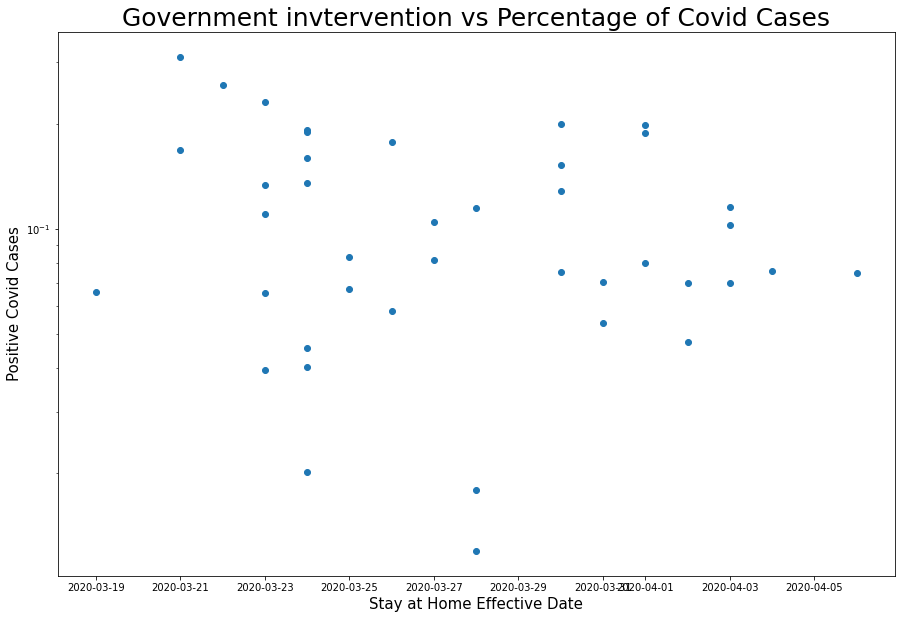

In [89]:
plt.figure(figsize=[15,10])
plt.scatter(cases_per_state['Effective Date'],cases_per_state['positive']/cases_per_state['tested'])
#plt.xscale('log')
plt.yscale('log')
plt.title('Government invtervention vs Percentage of Covid Cases', fontsize=25)
plt.xlabel('Stay at Home Effective Date',fontsize=15)
plt.ylabel('Positive Covid Cases', fontsize=15)
plt.show();

In [90]:
cases_per_state.sort_values('Effective Date', ascending=True).head()

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
4,California,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633
12,Illinois,2020-03-20,2020-03-21,6,12659682,12840762,228.0243,IL,538602,90369,4058,0.713833
29,New Jersey,2020-03-20,2020-03-21,11,8936574,8799624,1215.1991,NJ,462972,143905,10138,1.610293
31,New York,2020-03-20,2020-03-22,4,19440469,19400080,412.5211,NY,1338048,345813,22304,1.778831
46,Washington,2020-03-23,2020-03-23,13,7797095,6742902,117.3272,WA,273303,17951,992,0.230227


### Selecting target states and viewing cases over time

In [91]:
c_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [92]:
print(c_df.shape)
c_df.head()

(1141149, 6)


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [93]:
top_states = ['California','Texas', 'Florida', 'New York', 'Pennsylvania']

In [94]:
select_states = []
#for x in top_states:
for index, row in c_df.iterrows():
  if row['state'] in top_states:
    select_states.append(row)
ss_df = pd.DataFrame(select_states, columns=c_df.columns)      

In [95]:
ss_df = pd.DataFrame(ss_df.groupby(['date','state'])['cases'].sum())
ss_df.reset_index(inplace=True)

In [96]:
ss_df.head()

,date,state,cases
0,2020-01-25,California,1
1,2020-01-26,California,2
2,2020-01-27,California,2
3,2020-01-28,California,2
4,2020-01-29,California,2


In [97]:
ss_df.state.unique()

array(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'],
      dtype=object)

In [98]:
 cali_df = ss_df[ss_df['state'].str.contains('California')].copy(deep=True)
tex_df = ss_df[ss_df['state'].str.contains('Texas')].copy(deep=True)
flo_df = ss_df[ss_df['state'].str.contains('Florida')].copy(deep=True)
ny_df = ss_df[ss_df['state'].str.contains('New York')].copy(deep=True)
penn_df = ss_df[ss_df['state'].str.contains('Pennsylvania')].copy(deep=True)

Below is a graph of the top 5 states in terms of population in the United States.

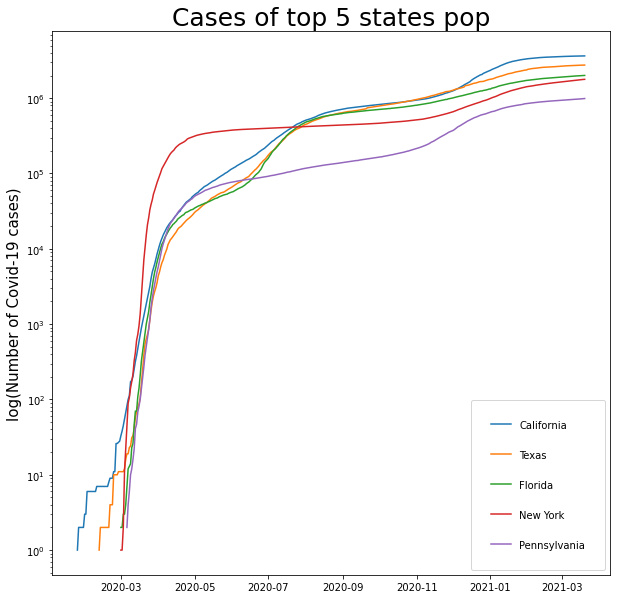

In [99]:
plt.figure(figsize=[10,10])
plt.plot(cali_df['date'],cali_df['cases'], label='California')
plt.plot(tex_df['date'], tex_df['cases'], label='Texas')
plt.plot(flo_df['date'], flo_df['cases'], label='Florida')
plt.plot(ny_df['date'], ny_df['cases'], label='New York')
plt.plot(penn_df['date'], penn_df['cases'], label='Pennsylvania')

plt.yscale('log')
#plt.xlabel('Dates by Week', fontsize=15)
plt.ylabel('log(Number of Covid-19 cases)', fontsize=15)
plt.title('Cases of top 5 states pop', fontsize=25)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

## Public hospitals vs Covid-19

Citations- “Total Hospitals.” The Henry J. Kaiser Family Foundation, 21 Feb. 2020, www.kff.org/other/state-indicator/total-hospitals.

Covid-19 is a respiratory infection, one of the treatments is being put on a ventilator and one of the shortages was ventilators in the United States. So I wanted to look into if the number of public hospitals a state had a correlation to the number of deaths or cases.

### Hospital vs Covid-19 deaths

In [100]:
hos_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/hospital_raw_data.csv', skiprows=[0,1])
hos_df = hos_df.drop(hos_df.index[0])

In [101]:
hos_df = hos_df.rename(columns= {'Location':'State'})

In [102]:
hos_df.head()

,State,Total Hospitals
1,Alabama,101.0
2,Alaska,21.0
3,Arizona,83.0
4,Arkansas,88.0
5,California,359.0


In [103]:
#Here I merge my hospital dataframe with my cases per state dataframe.
hos_cases_df = pd.merge(hos_df,cases_per_state, on='State')
hos_cases_df.head()

,State,Total Hospitals,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,101.0,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485,0.232020
1,Alaska,21.0,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10,0.052861
2,Arizona,83.0,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651,0.178478
3,Arkansas,88.0,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98,0.146858
4,California,359.0,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633


Below is a graph of the number of deaths compared to the number of public hospitals per 100000 people by state.

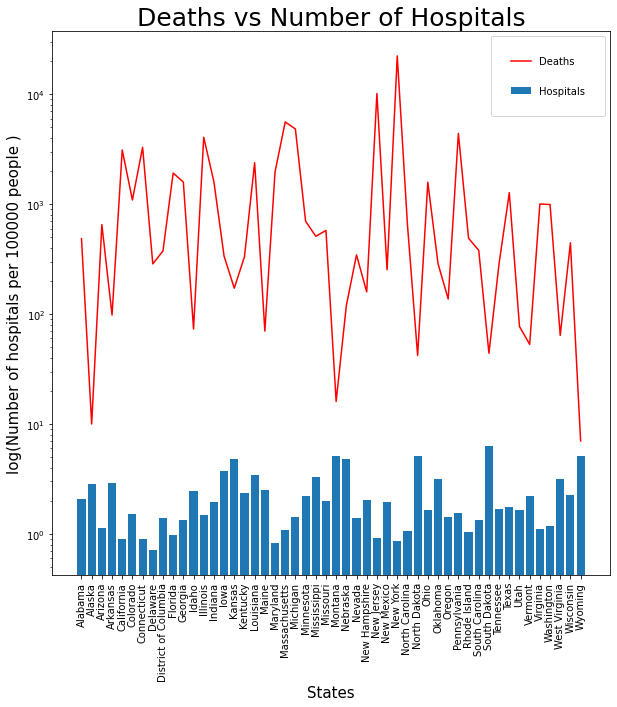

In [104]:
plt.figure(figsize=[10,10])
plt.bar(hos_cases_df['State'],hos_cases_df['Total Hospitals']/hos_cases_df['Pop']*100000, data=hos_cases_df, label='Hospitals')
plt.plot(hos_cases_df['State'],hos_cases_df['deaths'], label='Deaths', c='Red')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Deaths vs Number of Hospitals',fontsize=25) 
plt.xlabel('States', fontsize=15)
plt.ylabel('log(Number of hospitals per 100000 people )', fontsize=15)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

### Cases vs hospitals/density LRM

Here I create a linear regression model to see if total number of public hospitals per state and population density have a numerical correlation to the number of positive cases. 

In [105]:
hos_cases_df.head()

,State,Total Hospitals,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,101.0,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485,0.232020
1,Alaska,21.0,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10,0.052861
2,Arizona,83.0,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651,0.178478
3,Arkansas,88.0,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98,0.146858
4,California,359.0,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633


In [106]:
cases_target = pd.DataFrame(hos_cases_df.positive, columns=['positive'])
cases_target.head()

,positive
0,11389
1,388
2,13169
3,4463
4,74936


In [107]:
hos_X = pd.DataFrame(hos_cases_df[['Total Hospitals','density']])
hos_X.head()

,Total Hospitals,density
0,101.0,96.9221
1,21.0,1.2863
2,83.0,64.9550
3,88.0,58.4030
4,359.0,256.3727


In [108]:
hos_X['density'] = np.log(hos_X['density'])
hos_X['Total Hospitals'] = np.log(hos_X['Total Hospitals'])
hos_X.head()

,Total Hospitals,density
0,4.615121,4.573908
1,3.044522,0.251770
2,4.418841,4.173695
3,4.477337,4.067367
4,5.883322,5.546632


In [109]:
hos_model = sm.OLS(cases_target,hos_X).fit()
hos_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               positive   R-squared (uncentered):                   0.309
Model:                            OLS   Adj. R-squared (uncentered):              0.280
Method:                 Least Squares   F-statistic:                              10.74
Date:                Sat, 27 Mar 2021   Prob (F-statistic):                    0.000139
Time:                        16:52:17   Log-Likelihood:                         -612.09
No. Observations:                  50   AIC:                                      1228.
Df Residuals:                      48   BIC:                                      1232.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Total Hospitals   618.5558   4554.660      0.136      0.893   -8539.202    9776.314
density          6350.8176   4107.160      1.546      0.129   -1907.182    1.46e+04
==============================================================================
Omnibus:                       87.411   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1600.917
Skew:                           4.806   Prob(JB):                         0.00
Kurtosis:                      29.001   Cond. No.                         5.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
predictions2 = hos_model.predict(hos_X)

In [111]:
reg2 = linear_model.LinearRegression()
reg2.fit(hos_X, cases_target)
target_predict2 = reg2.predict(hos_X)

reg2.score(hos_X,cases_target)

0.24214967546495714

[[19425.04808898 12684.47067465]]
[-113877.39511595]


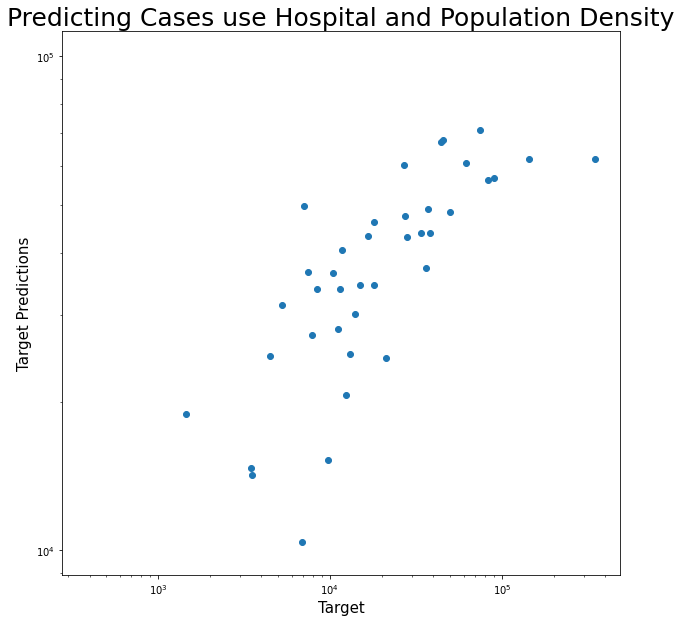

In [112]:
print(reg2.coef_)
print(reg2.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(cases_target, target_predict2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Target', fontsize=15)
plt.ylabel('Target Predictions', fontsize=15)
plt.title('Predicting Cases use Hospital and Population Density', fontsize=25);

## CDC DATA 

Citations - “COVID-19 Death Data and Resources - National Vital Statistics System.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 6 May 2020, www.cdc.gov/nchs/nvss/covid-19.htm.

In [113]:
cdc_df = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/CDC_Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv')

In [114]:
cdc_df.head()

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11),"Pneumonia, Influenza, and COVID-19 Deaths",Footnote
0,04/28/2020,By week,United States,Total Deaths,02/01/2020,04/25/2020,"31,587","693,128",0.94,"60,340","14,124","5,748","82,800",NaN
1,04/28/2020,By week,United States,Week-ending,02/01/2020,02/01/2020,0,"57,207",0.96,"3,683",0,468,"4,151",NaN
2,04/28/2020,By week,United States,Week-ending,02/08/2020,02/08/2020,0,"57,380",0.96,"3,651",0,493,"4,145",NaN
3,04/28/2020,By week,United States,Week-ending,02/15/2020,02/15/2020,0,"56,635",0.96,"3,673",0,513,"4,186",NaN
4,04/28/2020,By week,United States,Week-ending,02/22/2020,02/22/2020,0,"56,574",0.97,"3,547",0,534,"4,081",NaN


In [115]:
cdc_df['End week'].unique()

array(['04/25/2020', '02/01/2020', '02/08/2020', '02/15/2020',
       '02/22/2020', '02/29/2020', '03/07/2020', '03/14/2020',
       '03/21/2020', '03/28/2020', '04/04/2020', '04/11/2020',
       '04/18/2020'], dtype=object)

In [116]:
age_covid = cdc_df[cdc_df['Indicator'].str.contains('year')].copy(deep=True)
age_covid.reset_index(inplace=True, drop=True)

In [117]:
age_covid.head(20)

,Data as of,Group,State,Indicator,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11),"Pneumonia, Influenza, and COVID-19 Deaths",Footnote
0,04/28/2020,By age,United States,Under 1 year,02/01/2020,04/25/2020,4,"3,593",0.94,34,1,11,NaN,NaN
1,04/28/2020,By age,United States,1–4 years,02/01/2020,04/25/2020,2,701,0.94,32,2,30,NaN,NaN
2,04/28/2020,By age,United States,5–14 years,02/01/2020,04/25/2020,2,"1,036",0.94,36,0,40,NaN,NaN
3,04/28/2020,By age,United States,15–24 years,02/01/2020,04/25/2020,33,"6,134",0.94,128,14,40,NaN,NaN
4,04/28/2020,By age,United States,25–34 years,02/01/2020,04/25/2020,242,"13,034",0.94,429,102,129,NaN,NaN
5,04/28/2020,By age,United States,35–44 years,02/01/2020,04/25/2020,599,"18,803",0.94,963,236,205,NaN,NaN
6,04/28/2020,By age,United States,45–54 years,02/01/2020,04/25/2020,"1,649","36,432",0.94,"2,498",683,502,NaN,NaN
7,04/28/2020,By age,United States,55–64 years,02/01/2020,04/25/2020,"3,970","87,693",0.94,"7,306","1,748","1,060",NaN,NaN
8,04/28/2020,By age,United States,65–74 years,02/01/2020,04/25/2020,"6,841","136,383",0.94,"12,537","3,025","1,254",NaN,NaN
9,04/28/2020,By age,United States,75–84 years,02/01/2020,04/25/2020,"8,607","171,467",0.94,"16,653","3,955","1,285",NaN,NaN


In [118]:
age_covid['Indicator'].unique()

array(['Under 1 year', '1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 years', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [119]:
age_covid.dtypes

Data as of                                                     object
Group                                                          object
State                                                          object
Indicator                                                      object
Start week                                                     object
End week                                                       object
All COVID-19 Deaths (U07.1)                                    object
Deaths from All Causes                                         object
Percent of Expected Deaths                                    float64
All Pneumonia Deaths (J12.0-J18.9)                             object
Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)     object
All Influenza Deaths (J09-J11)                                 object
Pneumonia, Influenza, and COVID-19 Deaths                      object
Footnote                                                       object
dtype: object

In [120]:
age_covid['All COVID-19 Deaths (U07.1)'] = age_covid['All COVID-19 Deaths (U07.1)'].str.replace(',', '')
age_covid['All COVID-19 Deaths (U07.1)'] = age_covid['All COVID-19 Deaths (U07.1)'].astype(int)

In [121]:
age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'] = age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'].str.replace(',', '')
age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'] = age_covid['Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1)'].astype(int)

In [122]:
age_covid['All Influenza Deaths (J09-J11)'] = age_covid['All Influenza Deaths (J09-J11)'].str.replace(',', '')
age_covid['All Influenza Deaths (J09-J11)'] = age_covid['All Influenza Deaths (J09-J11)'].astype(int)

Using CDC data, It shows that Covid-19 is has a higher mortality rate amongst older age groups when compared to Influenza. 

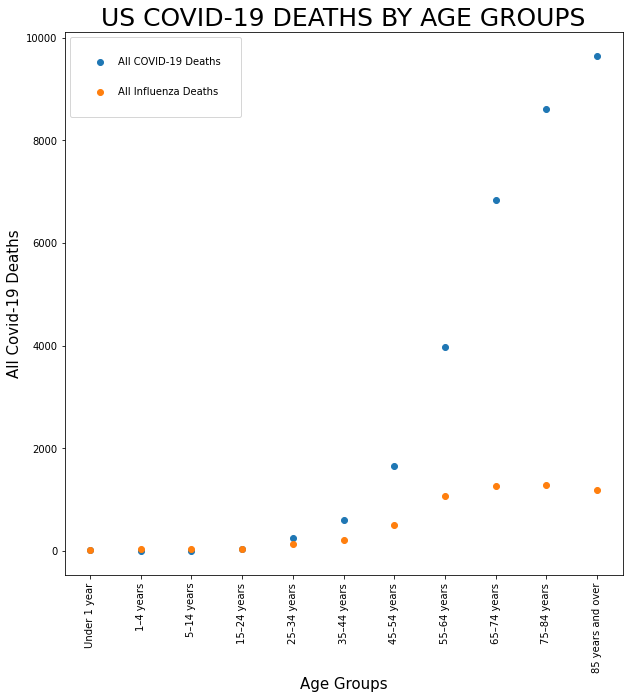

In [123]:
plt.figure(figsize=[10,10])
plt.scatter('Indicator','All COVID-19 Deaths (U07.1)', data=age_covid, label='All COVID-19 Deaths')
plt.scatter('Indicator','All Influenza Deaths (J09-J11)', data=age_covid,label='All Influenza Deaths ')
# plt.bar('Indicator','All COVID-19 Deaths (U07.1)', data=age_covid, label='All COVID-19 Deaths')
# plt.bar('Indicator','All Influenza Deaths (J09-J11)', data=age_covid,label='All Influenza Deaths ')
#plt.yscale('log')
plt.xticks(rotation=90)
plt.ylabel('All Covid-19 Deaths', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.title('US COVID-19 DEATHS BY AGE GROUPS', fontsize=25)
plt.legend(borderpad=2, labelspacing=2,fontsize=10);

Now I want to find the percentage of us population so i can divide the death by covid cases with the percentage of people in that age group in the US.

In [124]:
age_group_percent = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/US Population Dist by Age and Sex(2018).csv', skiprows=[0])

In [125]:
age_group_percent = age_group_percent.drop(labels=['Age','Unnamed: 1','Male % of Population','Female % of Population','Total Percent of population'], axis=1)

In [126]:
age_group_percent = age_group_percent.dropna()

In [127]:
age_group_percent['Total Percentage'] = age_group_percent['Total Percentage'].str.replace('%', '')
age_group_percent['Total Percentage'] = age_group_percent['Total Percentage'].astype(float)

In [128]:
age_group_percent.head(50)

,Indicator,Total Percentage
0,Under 1 year,1.17
1,1–4 years,7.33
2,5–14 years,12.56
3,15–24 years,13.14
4,25–34 years,12.66
5,35–44 years,12.62
6,45–54 year,12.73
7,55–64 years,11.77
8,65–74 years,8.64
9,75–84 years,4.68


In [129]:
age_group_percent.Indicator.unique()

array(['Under 1 year', ' 1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 year', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [130]:
age_group_percent['Indicator'] = age_group_percent['Indicator'].str.strip()

In [131]:
age_group_percent.Indicator.unique()

array(['Under 1 year', '1–4 years', '5–14 years', '15–24 years',
       '25–34 years', '35–44 years', '45–54 year', '55–64 years',
       '65–74 years', '75–84 years', '85 years and over'], dtype=object)

In [132]:
age_covid1 = pd.merge(age_group_percent,age_covid, on='Indicator')

In [133]:
age_covid1.head()

,Indicator,Total Percentage,Data as of,Group,State,Start week,End week,All COVID-19 Deaths (U07.1),Deaths from All Causes,Percent of Expected Deaths,All Pneumonia Deaths (J12.0-J18.9),Deaths with Pneumonia and COVID-19 (J12.0-J18.9 and U07.1),All Influenza Deaths (J09-J11),"Pneumonia, Influenza, and COVID-19 Deaths",Footnote
0,Under 1 year,1.17,04/28/2020,By age,United States,02/01/2020,04/25/2020,4,"3,593",0.94,34,1,11,NaN,NaN
1,1–4 years,7.33,04/28/2020,By age,United States,02/01/2020,04/25/2020,2,701,0.94,32,2,30,NaN,NaN
2,5–14 years,12.56,04/28/2020,By age,United States,02/01/2020,04/25/2020,2,"1,036",0.94,36,0,40,NaN,NaN
3,15–24 years,13.14,04/28/2020,By age,United States,02/01/2020,04/25/2020,33,"6,134",0.94,128,14,40,NaN,NaN
4,25–34 years,12.66,04/28/2020,By age,United States,02/01/2020,04/25/2020,242,"13,034",0.94,429,102,129,NaN,NaN


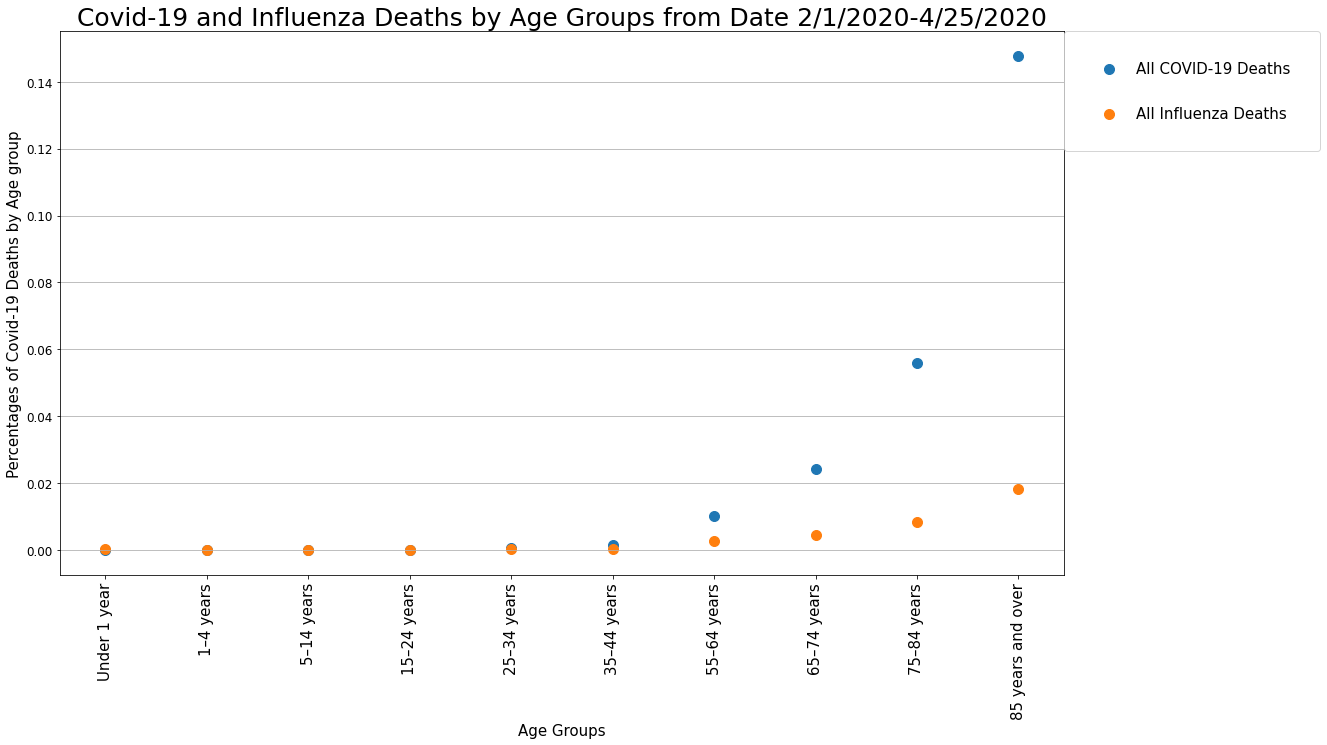

In [134]:
plt.figure(figsize=[18,10])

plt.scatter(age_covid1['Indicator'],100*age_covid1['All COVID-19 Deaths (U07.1)']/(age_covid1['Total Percentage']*328e4), label='All COVID-19 Deaths', s=100)
plt.scatter(age_covid1['Indicator'],100*age_covid1['All Influenza Deaths (J09-J11)']/(age_covid1['Total Percentage']*328e4), label='All Influenza Deaths', s=100)

#plt.yscale('log')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.xticks(fontsize=15)
plt.ylabel('Percentages of Covid-19 Deaths by Age group', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.title('Covid-19 and Influenza Deaths by Age Groups from Date 2/1/2020-4/25/2020', fontsize=25)
plt.legend(borderpad=2, labelspacing=2,fontsize=15,loc=(1,0.78));

## Public Transportation 

New York was one of the states hit hardest by Covid-19 having a majority of the cases that the United States has. I wanted to take a look at public transportation at a state level, and see if it had a correlation to the number of Covid-19 cases and potentially a strong insight on what to do to help reduce the number of cases in certian states or counties.

In [135]:
pub_trans = pd.read_csv('/content/drive/My Drive/COVID19 Capstone/Means of Transportation to Work, age 16 years by State.csv', skiprows=[0])
pub_trans = pub_trans.drop(index=list([11,51,52])).reset_index(drop=True,inplace=False)
pub_trans = pd.DataFrame(pub_trans, columns=['State','Public transportation (excluding taxicab)'])

In [136]:
pub_trans.head()

,State,Public transportation (excluding taxicab)
0,Alabama,"6,959"
1,Alaska,"4,981"
2,Arizona,"57,302"
3,Arkansas,"4,631"
4,California,"910,567"


In [137]:
pub_trans.shape

(50, 2)

In [138]:
pub_trans.dtypes

State                                        object
Public transportation (excluding taxicab)    object
dtype: object

In [139]:
pub_trans['Public transportation (excluding taxicab)'] = pub_trans['Public transportation (excluding taxicab)'].str.replace(',', '')
pub_trans['Public transportation (excluding taxicab)'] = pub_trans['Public transportation (excluding taxicab)'].astype(int)

In [140]:
cases_per_state.head()

,State,Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485,0.232020
1,Alaska,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10,0.052861
2,Arizona,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651,0.178478
3,Arkansas,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98,0.146858
4,California,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633


In [141]:
pub_trans = pd.merge(pub_trans,cases_per_state, on='State')

In [142]:
pub_trans.head()

,State,Public transportation (excluding taxicab),Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita
0,Alabama,6959,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485,0.232020
1,Alaska,4981,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10,0.052861
2,Arizona,57302,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651,0.178478
3,Arkansas,4631,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98,0.146858
4,California,910567,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633


In [143]:
pub_trans.dtypes

State                                                object
Public transportation (excluding taxicab)             int64
Date Announced                               datetime64[ns]
Effective Date                               datetime64[ns]
rank                                                  int64
Pop                                                   int64
Pop2010                                               int64
density                                             float64
state_abbrev                                         object
tested                                                int64
positive                                              int64
deaths                                                int64
case_per_capita                                     float64
dtype: object

### Percent of Population using Public Transportation vs Cases per capita

In [144]:
pub_trans['Population using PubTrans (%)'] = pub_trans['Public transportation (excluding taxicab)']/pub_trans['Pop']*100

In [145]:
pub_trans.head()

,State,Public transportation (excluding taxicab),Date Announced,Effective Date,rank,Pop,Pop2010,density,state_abbrev,tested,positive,deaths,case_per_capita,Population using PubTrans (%)
0,Alabama,6959,2020-04-03,2020-04-04,24,4908621,4785448,96.9221,AL,150717,11389,485,0.232020,0.141771
1,Alaska,4981,2020-03-27,2020-03-28,49,734002,713906,1.2863,AK,32418,388,10,0.052861,0.678609
2,Arizona,57302,2020-03-30,2020-03-31,14,7378494,6407774,64.9550,AZ,186904,13169,651,0.178478,0.776608
3,Arkansas,4631,NaT,NaT,33,3038999,2921978,58.4030,AR,81529,4463,98,0.146858,0.152386
4,California,910567,2020-03-19,2020-03-19,1,39937489,37320903,256.3727,CA,1133906,74936,3108,0.187633,2.279981


In [146]:
pub_trans.case_per_capita.head().sort_values(ascending=False)

0    0.232020
4    0.187633
2    0.178478
3    0.146858
1    0.052861
Name: case_per_capita, dtype: float64

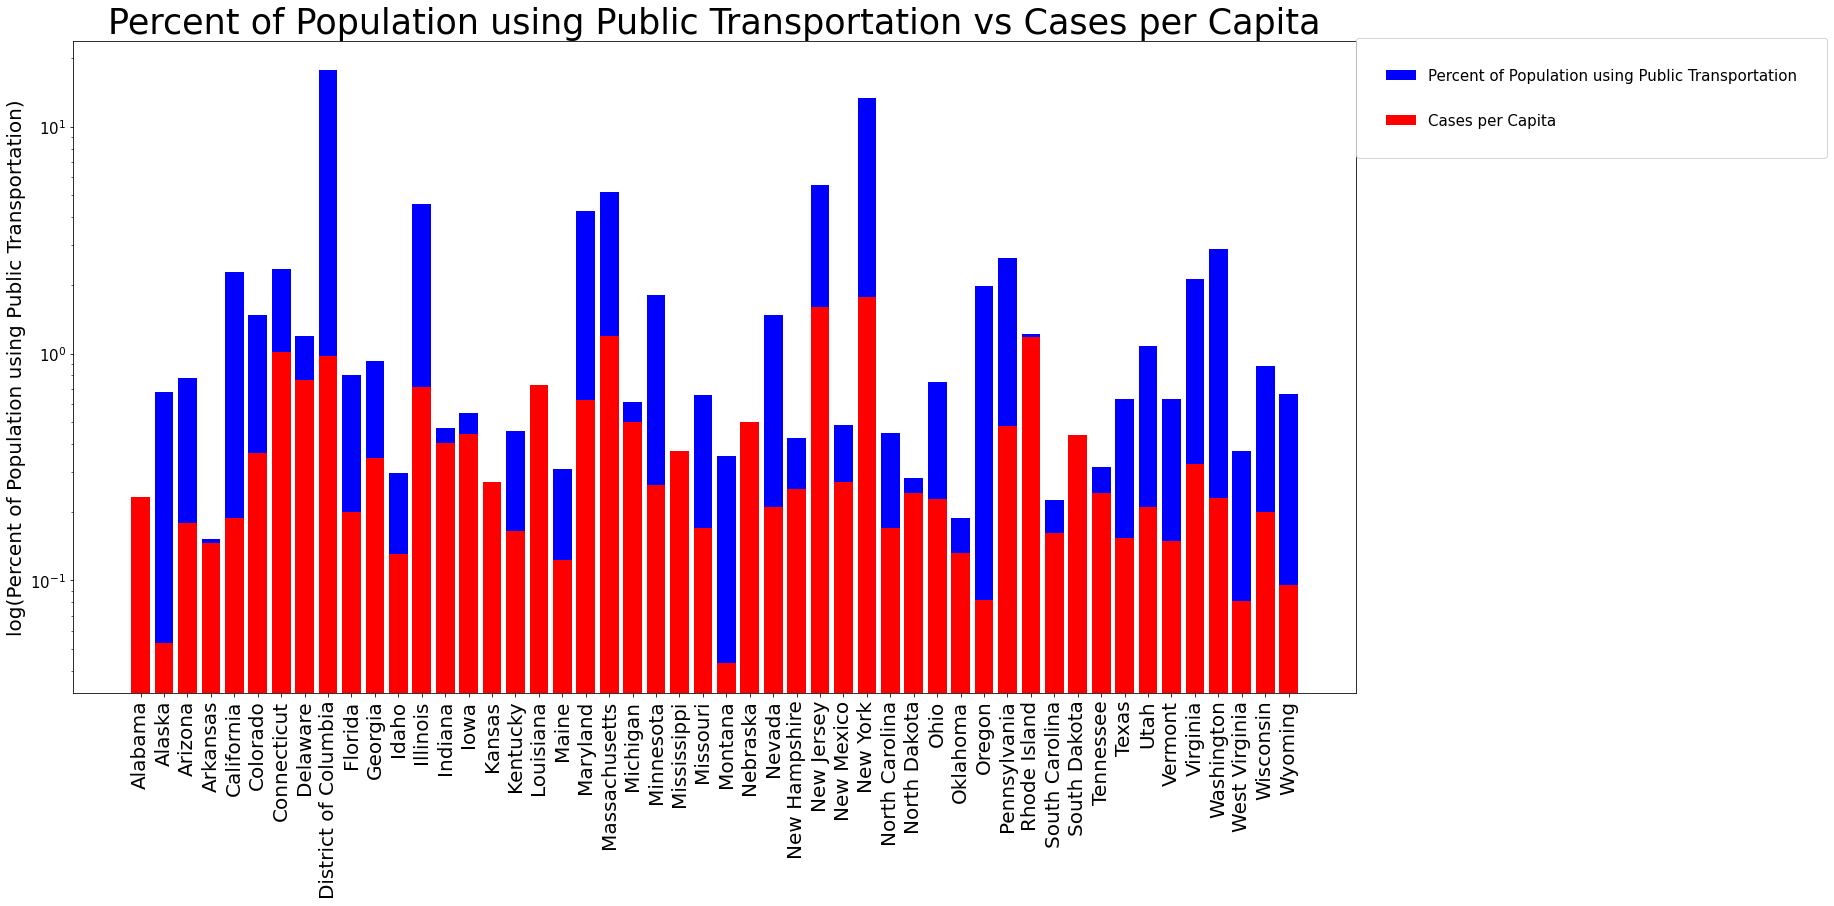

In [147]:
plt.figure(figsize=[23,12])

plt.bar(pub_trans['State'], pub_trans['Population using PubTrans (%)'],
        color='b', label='Percent of Population using Public Transportation')
plt.bar(pub_trans['State'], pub_trans['case_per_capita'],
        color='r', label='Cases per Capita')

plt.yscale('log')
plt.title('Percent of Population using Public Transportation vs Cases per Capita', fontsize=35)
plt.ylabel('log(Percent of Population using Public Transportation)', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(borderpad=2, labelspacing=2,fontsize=15,loc=(1,.82));

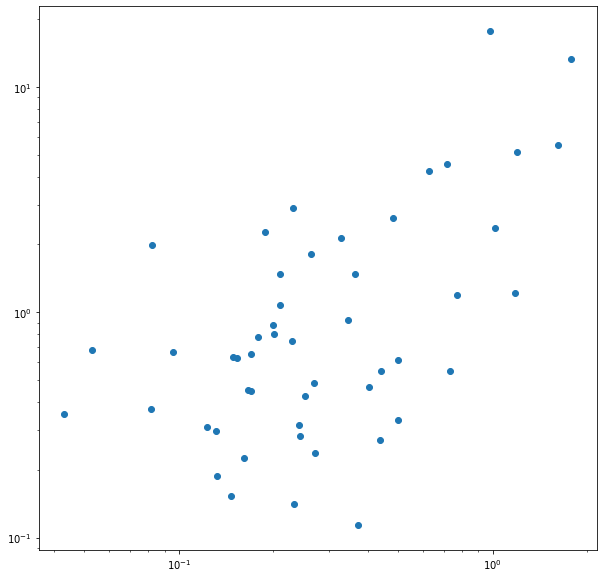

In [148]:
plt.figure(figsize=[10,10])
plt.scatter(pub_trans['case_per_capita'], pub_trans['Population using PubTrans (%)'])
plt.yscale('log')
plt.xscale('log');

### LRM for state transportation

In [149]:
state_pub_target = pd.DataFrame(pub_trans, columns=['positive'])
state_pub_target.head()

,positive
0,11389
1,388
2,13169
3,4463
4,74936


In [150]:
pub_trans.columns

Index(['State', 'Public transportation (excluding taxicab)', 'Date Announced',
       'Effective Date', 'rank', 'Pop', 'Pop2010', 'density', 'state_abbrev',
       'tested', 'positive', 'deaths', 'case_per_capita',
       'Population using PubTrans (%)'],
      dtype='object')

In [151]:
state_pub_X = pd.DataFrame(pub_trans['Population using PubTrans (%)'], columns=['Population using PubTrans (%)']).copy(deep=True)
state_pub_X['ones'] = 1
state_pub_X.head()

,Population using PubTrans (%),ones
0,0.141771,1
1,0.678609,1
2,0.776608,1
3,0.152386,1
4,2.279981,1


In [152]:
state_pub_model = sm.OLS(state_pub_target,state_pub_X).fit()
state_pub_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               positive   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     25.77
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           6.21e-06
Time:                        16:52:22   Log-Likelihood:                -604.16
No. Observations:                  50   AIC:                             1212.
Df Residuals:                      48   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Population using PubTrans (%)  1.005e+04   1980.083      5.077      0.000    6070.778     1.4e+04
ones                           1.105e+04   7093.691      1.558      0.126   -3210.545    2.53e+04
==============================================================================
Omnibus:                       29.460   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.793
Skew:                           0.679   Prob(JB):                     1.24e-83
Kurtosis:                      16.469   Cond. No.                         4.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
state_pub_predictions = state_pub_model.predict(state_pub_X)

In [154]:
state_pub_reg = linear_model.LinearRegression()
state_pub_reg.fit(state_pub_X, state_pub_target)
state_pub_target_predict = state_pub_reg.predict(state_pub_X)

reg.score(state_pub_X,state_pub_target)

-0.2935301209500447

[[10052.00076018     0.        ]]
[11052.27726933]


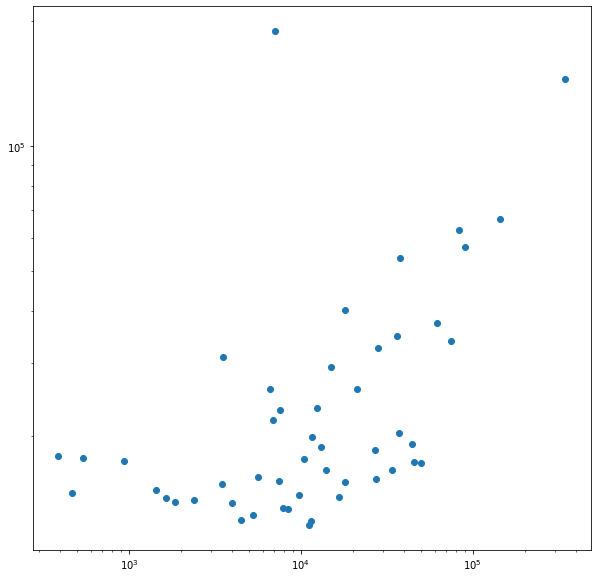

In [155]:
print(state_pub_reg.coef_)
print(state_pub_reg.intercept_)

plt.figure(figsize=(10,10));
plt.scatter(state_pub_target, state_pub_target_predict)
plt.yscale('log')
plt.xscale('log');

## Conclusion


Covid-19 has changed the world we lived in, and in these difficult times the data community has come together and really stepped up. Millions of dataframes and terrabytes of data has been scrapped and created, allowing starting data scientist like me an amazing oppurtunity to gain insight on the ensuing pandemic. After finishing my exploratory data analysis and reviewing it I see that there is a lot left to be desired. Here are somethings I saw and would changed and hopefully improve.   

**Things I would change as of 5/18/2020**   
- I created various graphs and hard coded them everytime, creating some functions would help save alot of time over the course of a longer EDA project.
- I didnt spend as much time in each subject so maybe taking the more positive categories like public transportation and population density. 
- There are some filtering I did in the eariler parts of the notebook where I think functions would help the simplify and refine the selection process. 
- Since It was a rather long EDA I found it difficult where and when to explain when I am doing something and when I dont have to.   

If you have any comment, questions, or constructive criticisms please feel free to let me know so I can continue to grow as a Data Scientist !!!
